# Installation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [4]:
df = pd.read_csv('data/laptop_merge_v1.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [6]:
print(f'Shape: {df.shape}')

Shape: (1353, 40)


In [7]:
overview = pd.DataFrame({
    "Columns name": df.columns,
    "Data type": df.dtypes,
    "Data example": [df[col].dropna().iloc[0] if df[col].notna().any() else None for col in df.columns],
    "Null count": df.isnull().sum(),
    "Null %":(df.isnull().mean() * 100).round(2),
    "Unique value count": df.nunique()
})
overview.reset_index(drop=True, inplace=True)
overview = overview.sort_values('Null count', ascending=False)
overview

,Columns name,Data type,Data example,Null count,Null %,Unique value count
36,vga_vram,float64,8.0,985,72.80,9
12,cpu_threads,float64,24.0,642,47.45,14
19,cpu_speed,float64,2.0,566,41.83,36
10,cpu_max_speed,float64,5.1,417,30.82,31
18,refresh_rate,float64,165.0,409,30.23,9
11,root_price,float64,44990000.0,353,26.09,196
27,cpu_model,object,hx 370,283,20.92,223
16,discounted_price,float64,39990000.0,260,19.22,322
13,cpu_cores,float64,12.0,160,11.83,12
14,ram_speed,float64,7500.0,150,11.09,30


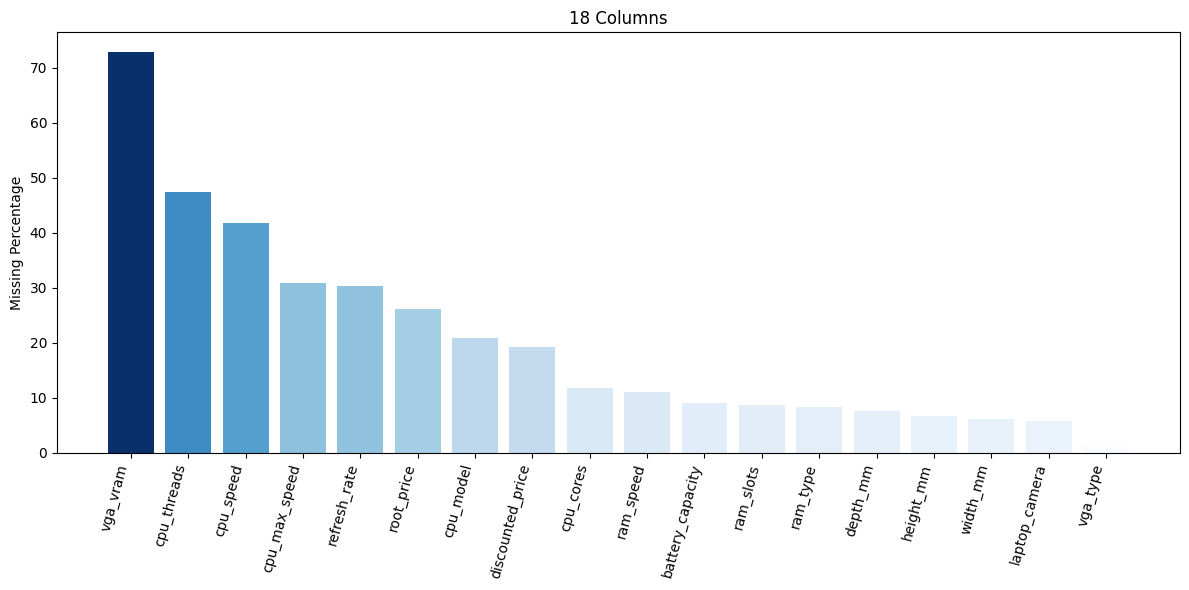

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 1. Filter columns with missing values
missing_cols = overview[overview['Null %'] > 0].sort_values('Null %', ascending=False)

# 2. Normalize missing % to range [0, 1] for color mapping
norm = plt.Normalize(missing_cols['Null %'].min(), missing_cols['Null %'].max())

# 3. Create colors from a colormap (e.g., 'Reds' or 'Oranges')
colors = cm.Blues(norm(missing_cols['Null %']))

# 4. Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_cols['Columns name'], missing_cols['Null %'], color=colors)

# 5. Style
plt.xticks(rotation=75, ha='right')
plt.ylabel("Missing Percentage")
plt.title(f"{len(missing_cols)} Columns")
plt.tight_layout()
plt.show()



In [14]:
print(df.select_dtypes(include='number').columns)

Index(['cam_ung', 'height_mm', 'storage_max_support', 'storage_gb',
       'display_width', 'bluetooth_version', 'width_mm', 'cpu_max_speed',
       'root_price', 'cpu_threads', 'cpu_cores', 'ram_speed', 'product_weight',
       'discounted_price', 'refresh_rate', 'cpu_speed', 'ram_storage',
       'is_installment', 'ram_slots', 'battery_capacity', 'depth_mm',
       'display_height', 'vga_vram', 'display_size'],
      dtype='object')


In [15]:
print(df.select_dtypes(include='object').columns)

Index(['url_path', 'material', 'manufacturer', 'ram_type', 'name',
       'os_version', 'laptop_color', 'cpu_model', 'nhu_cau_su_dung',
       'vga_type', 'image', 'vga_brand', 'product_id', 'cpu_series',
       'laptop_camera', 'cpu_brand'],
      dtype='object')


# Sorting
- Numberical:  
  + *Continuous*: 'height_mm', 'width_mm', 'root_price', 'display_width', 'product_weight', 'discounted_price', 'depth_mm', 'display_height', 'display_size', 'battery_capacity', 'cpu_max_speed', 'cpu_speed'
  
  + *Discrete*: 'cam_ung', 'storage_max_support', 'storage_gb', 'bluetooth_version', 'cpu_threads', 'cpu_cores', 'ram_speed', 'refresh_rate', 'ram_storage', 'is_installment', 'ram_slots', 'vga_vram'
  
- *Categorical*: 'material', 'manufacturer', 'ram_type', 'os_version', 'laptop_color', 'vga_brand', 'cpu_series', 'laptop_camera', 'cpu_brand','cpu_model', 'nhu_cau_su_dung','vga_type', 
  
- *Meta data*: 'url_path', 'name', 'image',  'product_id'

# Numerical - Continuous

In [200]:
continuous_cols = ['height_mm', 'width_mm', 'root_price', 'display_width', 'product_weight', 'discounted_price', 'depth_mm', 'display_height', 'display_size', 'battery_capacity', 'cpu_max_speed', 'cpu_speed']

In [201]:
def calculate_for_outliers(continuous_cols):
    Q1 = continuous_cols.quantile(0.25)
    Q3 = continuous_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =  Q3 + 1.5 * IQR
    outlier = continuous_cols[(continuous_cols < lower_bound) | (continuous_cols > upper_bound)]
    result = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outlier,
        'outlier_count': outlier.count(),
        'outlier_percentage': ((outlier.count()/ continuous_cols.count()) * 100) *round(2)
    }
    return result

In [202]:
def check_outliers(continuous_cols):
    sns.set(style='whitegrid')
    plt.rcParams['figure.figsize'] = (12, 5)
    for col in continuous_cols:
        print(f'\nColumn name: {col}')
        print("=" * 50)
        col_data = df[col].dropna()
        
        #1. Statistic
        print("Statistical description: ")
        print(col_data.describe())
        
        #2. Skewness and Kurtosis
        print('-' * 50)
        sk = skew(col_data.dropna())
        kurt = kurtosis(col_data.dropna())
        print(f'Skewness: {sk:.4f}')
        if sk > 1:
            print("Phân phối lệch phải mạnh")
        elif sk > 0.5:
            print("Phân phối lệch phải nhẹ")
        elif sk < -1:
            print("Phân phối lệch trái mạnh")
        elif sk < -0.5:
            print("Phân phối lệch trái nhẹ")
        else: 
            print("Phân phối gần đối xứng")
            
        print(f"Kurtosis: {kurt:.4f}")
        if kurt > 1:
            print("Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers")
        elif kurt < -1:
            print("Phân phối bẹt, đuôi mỏng -> Có khả năng ít outliers")
        else:
            print("Phân phối có độ nhọn tương tự chuẩn")
            
        print('-' * 50)
        # Calculate IQR and number of outliers
        iqr_result = calculate_for_outliers(col_data)
        print(f"Q1: {iqr_result['Q1']:.2f}")
        print(f"Q3 : {iqr_result['Q3']:.2f}")
        print(f"IQR: {iqr_result['IQR']:.2f}")
        print(f"Lower bound: {iqr_result['lower_bound']:.2f}")
        print(f"Upper bound: {iqr_result['upper_bound']:.2f}")
        print(f"Number of outliers: {iqr_result['outlier_count']}")
        print(f"Percentage of outliers: {iqr_result['outlier_percentage']:.2f}%")
        print(f"Examples of outliers:\n{iqr_result['outliers'].head(10)}")
        
        # 4. Draw histogram and density graph
        plt.figure(figsize=(12, 5))
        sns.histplot(col_data, kde=True, bins=30, color='skyblue')
        mean_val =  col_data.mean()
        plt.title(f"Histogram and density plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        
        if pd.notna(mean_val):
            plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
            plt.legend()
            plt.show()
            
        # 5. Draw boxplot
        plt.figure(figsize=(10,2))
        sns.boxplot(x=col_data, color='lightcoral')
        plt.title(f"Boxplot to detect outliers: {col}")
        plt.xlabel(col)
        plt.show()



Column name: height_mm
Statistical description: 
count    1263.000000
mean      240.952930
std        57.329291
min        10.400000
25%       221.000000
50%       235.560000
75%       251.000000
max       461.000000
Name: height_mm, dtype: float64
--------------------------------------------------
Skewness: 1.4880
Phân phối lệch phải mạnh
Kurtosis: 9.5695
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 221.00
Q3 : 251.00
IQR: 30.00
Lower bound: 176.00
Upper bound: 296.00
Number of outliers: 100
Percentage of outliers: 15.84%
Examples of outliers:
363    307.5
366    307.5
474    127.0
541    127.0
545     19.7
553    127.0
589    369.0
602    127.0
604    461.0
605    461.0
Name: height_mm, dtype: float64


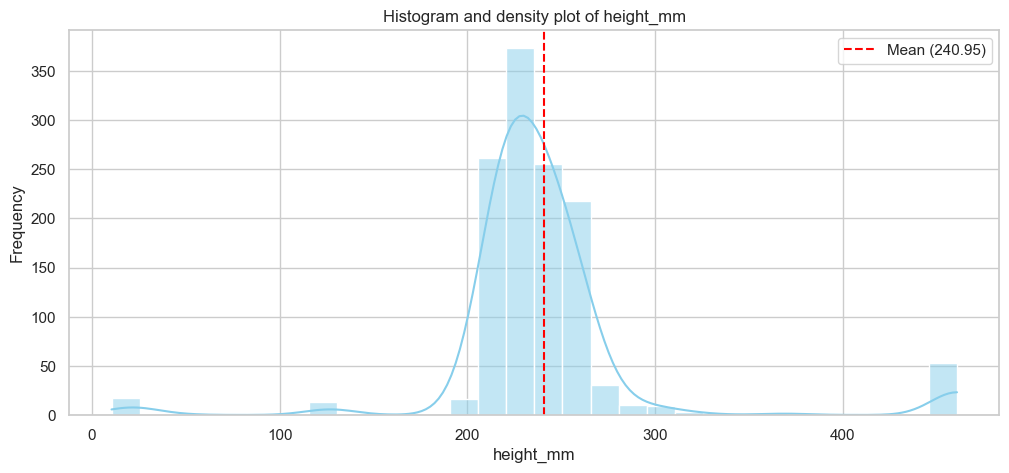

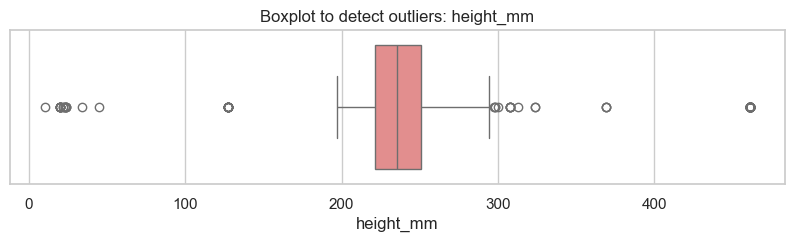


Column name: width_mm
Statistical description: 
count    1270.000000
mean      338.567354
std        69.058211
min         1.600000
25%       312.600000
50%       353.600000
75%       359.000000
max       547.000000
Name: width_mm, dtype: float64
--------------------------------------------------
Skewness: -1.0064
Phân phối lệch trái mạnh
Kurtosis: 9.9161
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 312.60
Q3 : 359.00
IQR: 46.40
Lower bound: 243.00
Upper bound: 428.60
Number of outliers: 94
Percentage of outliers: 14.80%
Examples of outliers:
474    127.0
525    197.0
541    127.0
545     19.7
553    127.0
602    127.0
604    547.0
605    547.0
606    547.0
607    547.0
Name: width_mm, dtype: float64


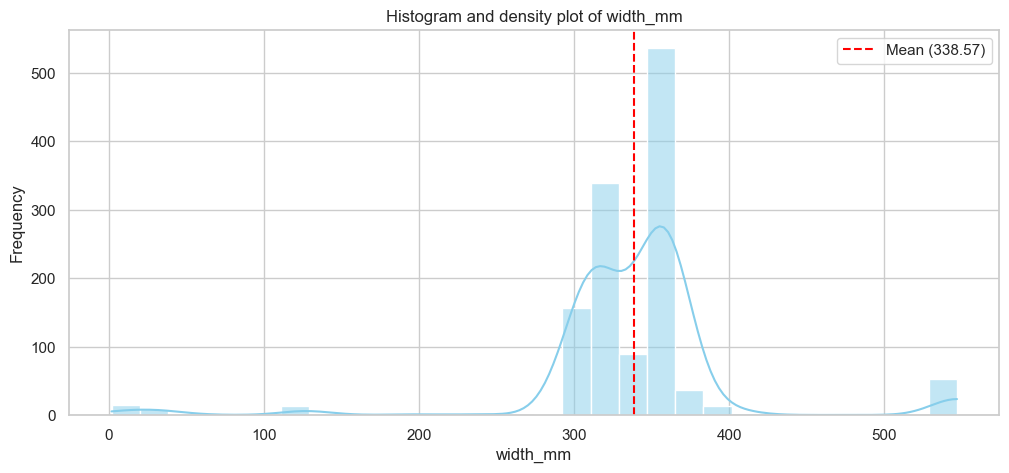

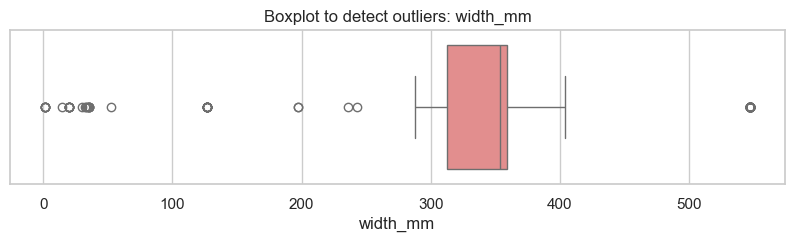


Column name: root_price
Statistical description: 
count    1.000000e+03
mean     3.316131e+07
std      2.178023e+07
min      0.000000e+00
25%      2.049000e+07
50%      2.799000e+07
75%      3.899000e+07
max      1.949900e+08
Name: root_price, dtype: float64
--------------------------------------------------
Skewness: 2.9173
Phân phối lệch phải mạnh
Kurtosis: 13.0984
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 20490000.00
Q3 : 38990000.00
IQR: 18500000.00
Lower bound: -7260000.00
Upper bound: 66740000.00
Number of outliers: 59
Percentage of outliers: 11.80%
Examples of outliers:
249    74990000.0
250    74990000.0
251    89990000.0
252    89990000.0
271    69990000.0
274    83790000.0
275    83790000.0
276    68790000.0
277    68790000.0
311    66990000.0
Name: root_price, dtype: float64


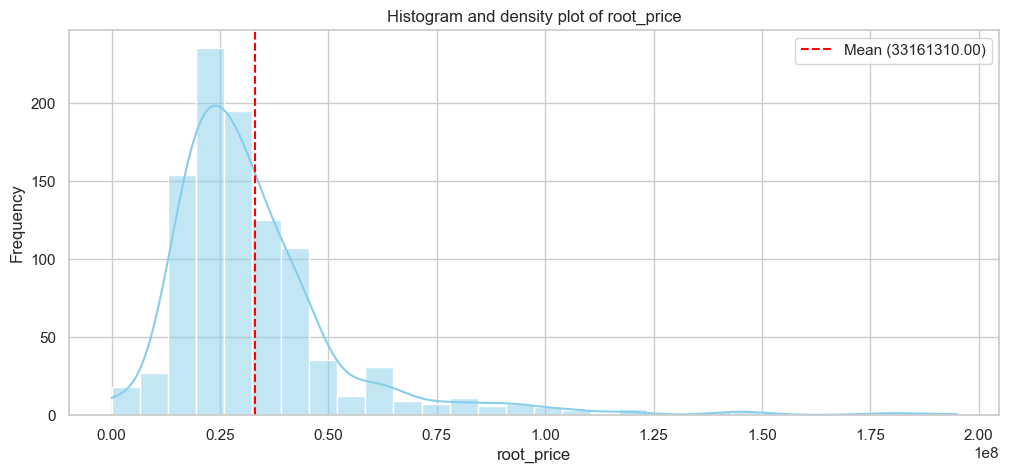

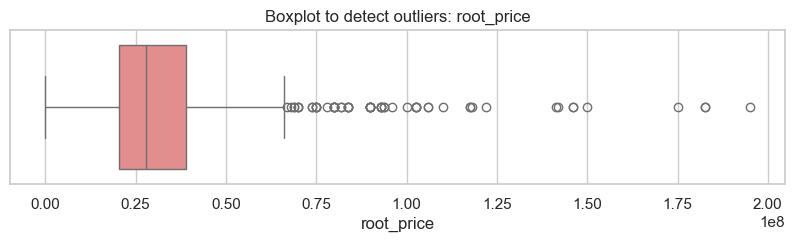


Column name: display_width
Statistical description: 
count    1353.000000
mean     2336.480414
std       714.372296
min         0.000000
25%      1920.000000
50%      1920.000000
75%      2880.000000
max      4480.000000
Name: display_width, dtype: float64
--------------------------------------------------
Skewness: 0.5775
Phân phối lệch phải nhẹ
Kurtosis: 2.7615
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 1920.00
Q3 : 2880.00
IQR: 960.00
Lower bound: 480.00
Upper bound: 4320.00
Number of outliers: 77
Percentage of outliers: 11.38%
Examples of outliers:
474       0.0
525       0.0
541       0.0
545       0.0
553       0.0
602       0.0
604    4480.0
605    4480.0
606    4480.0
607    4480.0
Name: display_width, dtype: float64


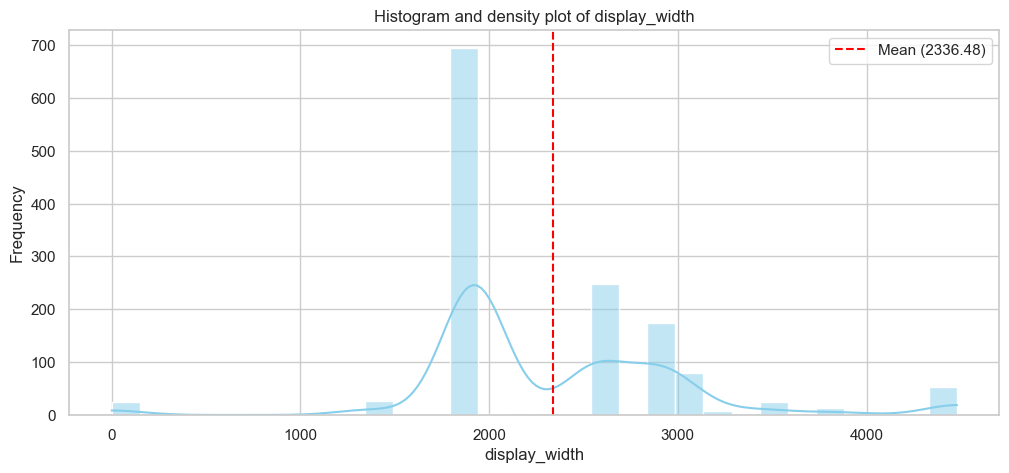

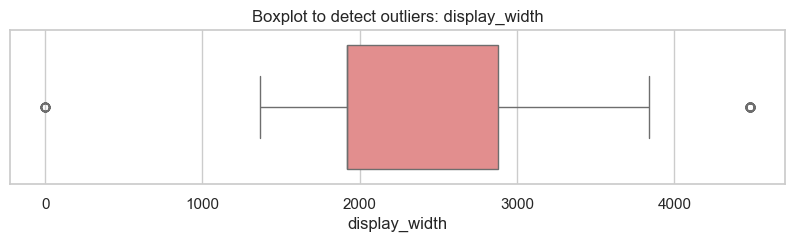


Column name: product_weight
Statistical description: 
count    1353.000000
mean        1.791067
std         0.780005
min         0.670000
25%         1.390000
50%         1.600000
75%         2.000000
max        16.000000
Name: product_weight, dtype: float64
--------------------------------------------------
Skewness: 5.8715
Phân phối lệch phải mạnh
Kurtosis: 83.4362
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 1.39
Q3 : 2.00
IQR: 0.61
Lower bound: 0.47
Upper bound: 2.92
Number of outliers: 69
Percentage of outliers: 10.20%
Examples of outliers:
363    3.60
366    3.60
604    4.42
605    4.42
606    4.42
607    4.42
608    4.42
609    4.42
610    4.42
817    4.42
Name: product_weight, dtype: float64


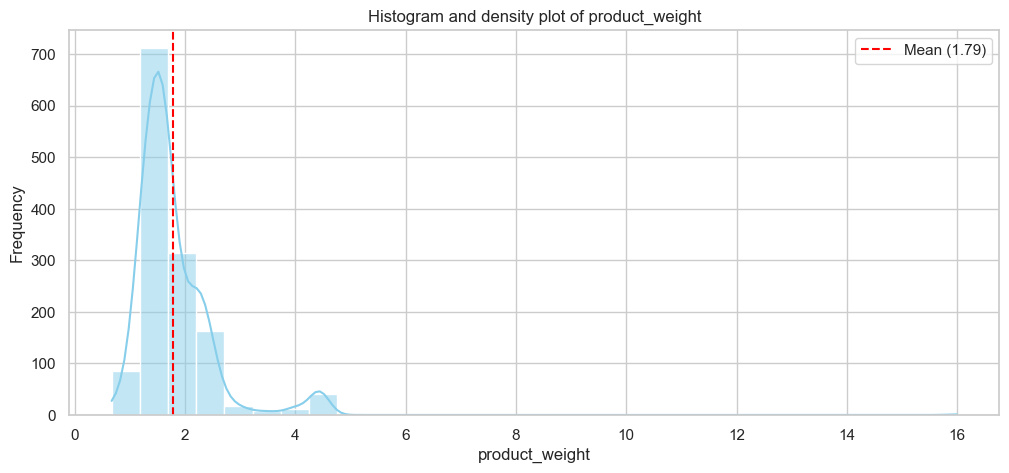

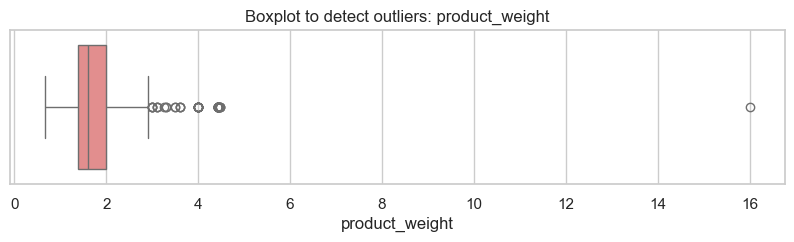


Column name: discounted_price
Statistical description: 
count    1.093000e+03
mean     3.089822e+07
std      2.158909e+07
min      0.000000e+00
25%      1.799000e+07
50%      2.599000e+07
75%      3.699000e+07
max      1.944900e+08
Name: discounted_price, dtype: float64
--------------------------------------------------
Skewness: 3.0138
Phân phối lệch phải mạnh
Kurtosis: 14.0164
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 17990000.00
Q3 : 36990000.00
IQR: 19000000.00
Lower bound: -10510000.00
Upper bound: 65490000.00
Number of outliers: 56
Percentage of outliers: 10.25%
Examples of outliers:
105    71990000.0
249    74490000.0
250    74490000.0
251    87990000.0
252    87990000.0
271    69490000.0
274    82090000.0
275    82090000.0
276    68490000.0
277    68490000.0
Name: discounted_price, dtype: float64


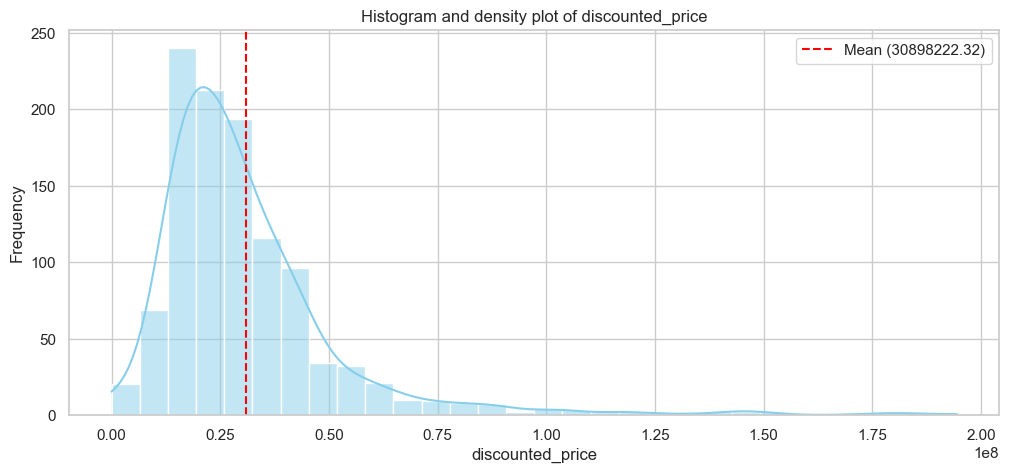

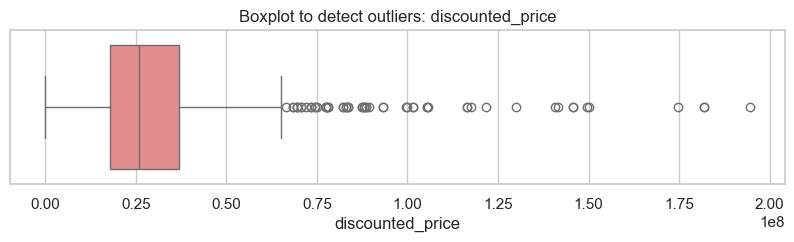


Column name: depth_mm
Statistical description: 
count    1251.000000
mean       24.310384
std        30.234496
min         1.000000
25%        15.500000
50%        17.900000
75%        21.700000
max       259.400000
Name: depth_mm, dtype: float64
--------------------------------------------------
Skewness: 4.7661
Phân phối lệch phải mạnh
Kurtosis: 23.7811
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 15.50
Q3 : 21.70
IQR: 6.20
Lower bound: 6.20
Upper bound: 31.00
Number of outliers: 89
Percentage of outliers: 14.23%
Examples of outliers:
4        4.10
363     32.05
366     32.05
474     50.00
525     95.00
541     50.00
545      3.60
553     50.00
589    259.40
602     50.00
Name: depth_mm, dtype: float64


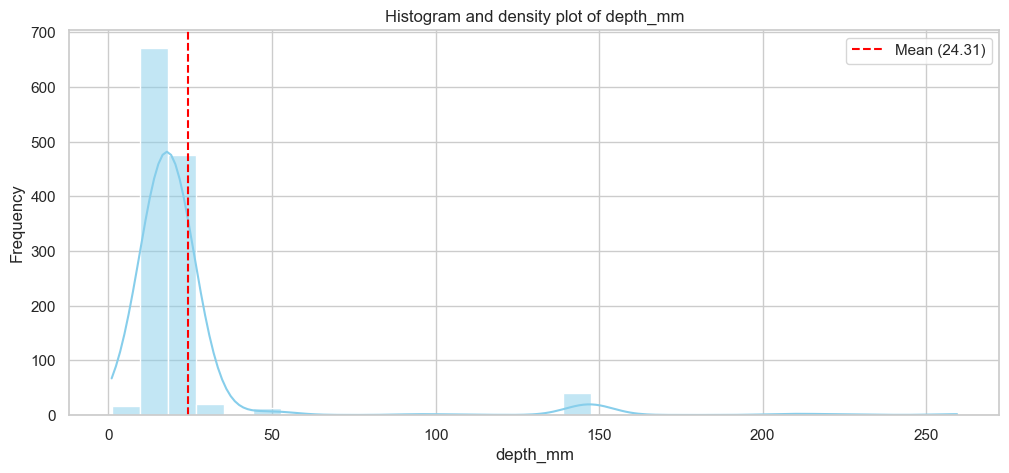

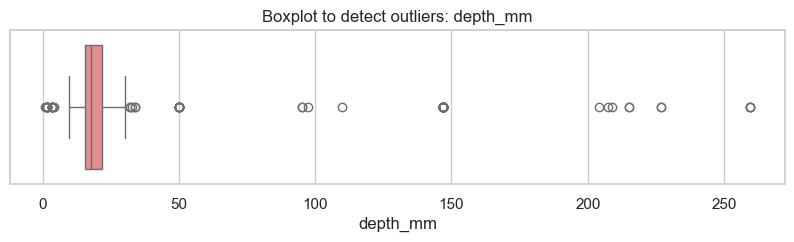


Column name: display_height
Statistical description: 
count    1353.000000
mean     1412.870658
std       459.520179
min         0.000000
25%      1080.000000
50%      1200.000000
75%      1800.000000
max      2520.000000
Name: display_height, dtype: float64
--------------------------------------------------
Skewness: 0.2354
Phân phối gần đối xứng
Kurtosis: 0.7068
Phân phối có độ nhọn tương tự chuẩn
--------------------------------------------------
Q1: 1080.00
Q3 : 1800.00
IQR: 720.00
Lower bound: 0.00
Upper bound: 2880.00
Number of outliers: 0
Percentage of outliers: 0.00%
Examples of outliers:
Series([], Name: display_height, dtype: float64)


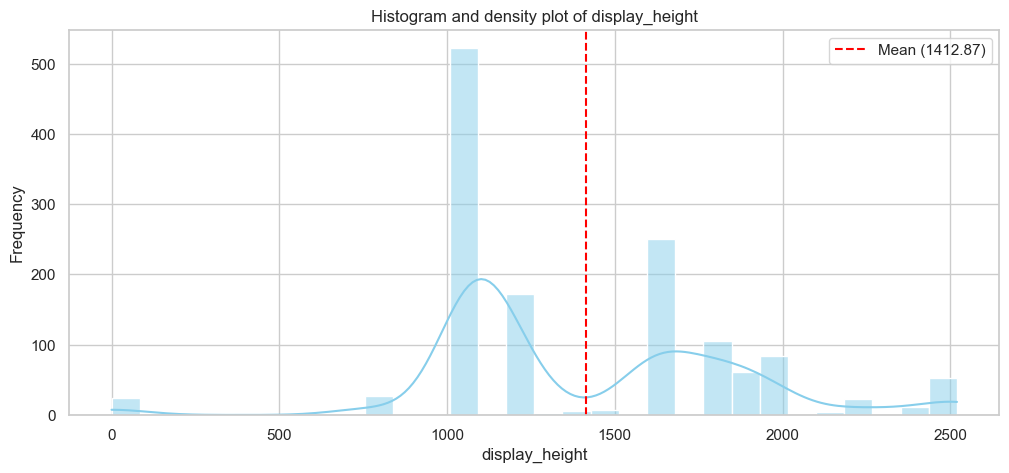

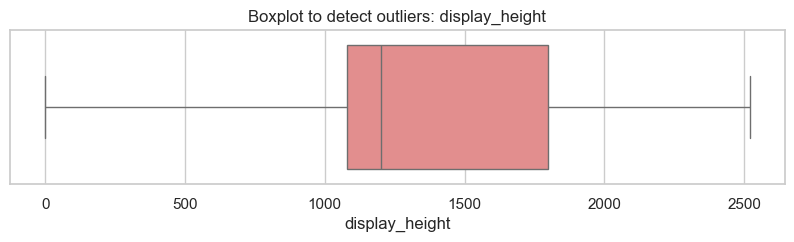


Column name: display_size
Statistical description: 
count    1353.000000
mean       15.014486
std         2.872605
min         0.000000
25%        14.000000
50%        15.300000
75%        15.600000
max        28.000000
Name: display_size, dtype: float64
--------------------------------------------------
Skewness: -1.2787
Phân phối lệch trái mạnh
Kurtosis: 14.3587
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 14.00
Q3 : 15.60
IQR: 1.60
Lower bound: 11.60
Upper bound: 18.00
Number of outliers: 80
Percentage of outliers: 11.83%
Examples of outliers:
195    11.6
351    28.0
474     0.0
525     0.0
541     0.0
545     0.0
553     0.0
602     0.0
604    24.0
605    24.0
Name: display_size, dtype: float64


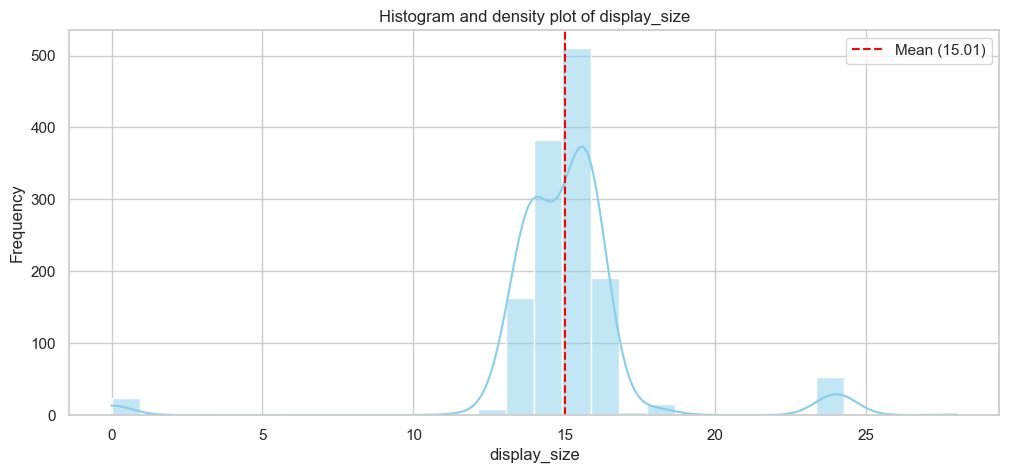

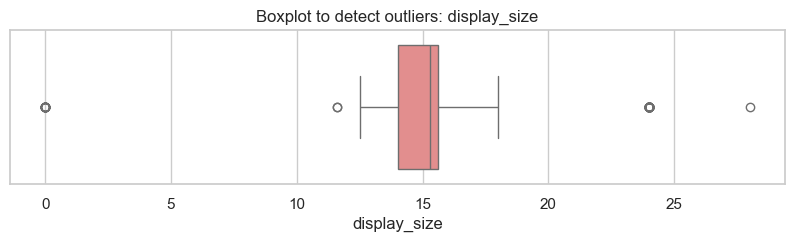


Column name: battery_capacity
Statistical description: 
count    1231.000000
mean       55.979139
std        21.742451
min         0.000000
25%        45.000000
50%        56.000000
75%        70.000000
max       150.000000
Name: battery_capacity, dtype: float64
--------------------------------------------------
Skewness: -0.6058
Phân phối lệch trái nhẹ
Kurtosis: 1.3153
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 45.00
Q3 : 70.00
IQR: 25.00
Lower bound: 7.50
Upper bound: 107.50
Number of outliers: 88
Percentage of outliers: 14.30%
Examples of outliers:
474      0.0
478    150.0
525      0.0
541      0.0
545      0.0
553      0.0
602      0.0
604      0.0
605      0.0
606      0.0
Name: battery_capacity, dtype: float64


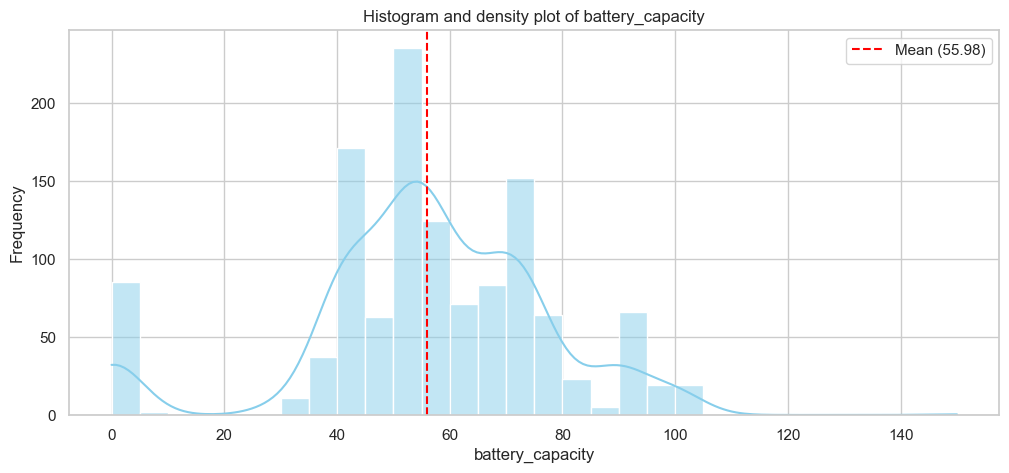

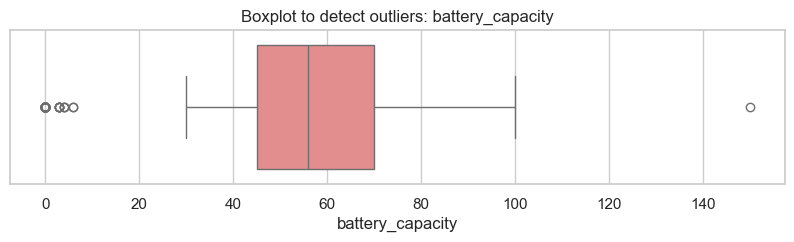


Column name: cpu_max_speed
Statistical description: 
count    936.000000
mean       4.614199
std        0.446810
min        2.600000
25%        4.400000
50%        4.600000
75%        4.900000
max        5.800000
Name: cpu_max_speed, dtype: float64
--------------------------------------------------
Skewness: -0.8307
Phân phối lệch trái nhẹ
Kurtosis: 3.5624
Phân phối nhọn, đuôi dày -> Có khả năng nhiều outliers
--------------------------------------------------
Q1: 4.40
Q3 : 4.90
IQR: 0.50
Lower bound: 3.65
Upper bound: 5.65
Number of outliers: 57
Percentage of outliers: 12.18%
Examples of outliers:
4      3.2
55     3.5
56     3.5
57     3.5
128    5.8
130    5.8
131    5.8
194    2.8
195    2.8
253    3.5
Name: cpu_max_speed, dtype: float64


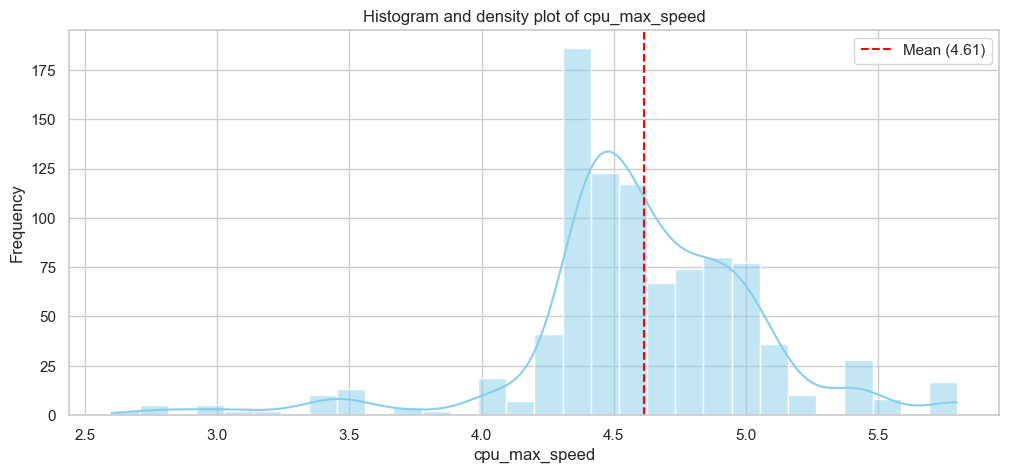

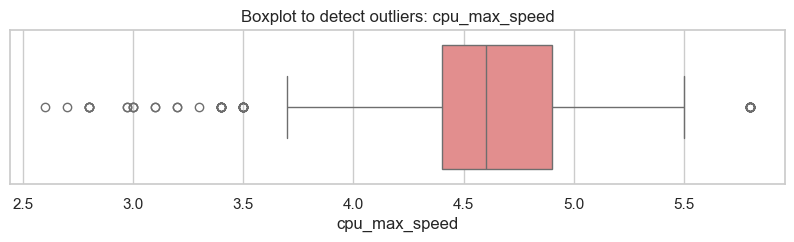


Column name: cpu_speed
Statistical description: 
count    787.000000
mean       2.388183
std        0.861843
min        0.900000
25%        1.700000
50%        2.300000
75%        3.200000
max        4.900000
Name: cpu_speed, dtype: float64
--------------------------------------------------
Skewness: 0.3761
Phân phối gần đối xứng
Kurtosis: -0.8144
Phân phối có độ nhọn tương tự chuẩn
--------------------------------------------------
Q1: 1.70
Q3 : 3.20
IQR: 1.50
Lower bound: -0.55
Upper bound: 5.45
Number of outliers: 0
Percentage of outliers: 0.00%
Examples of outliers:
Series([], Name: cpu_speed, dtype: float64)


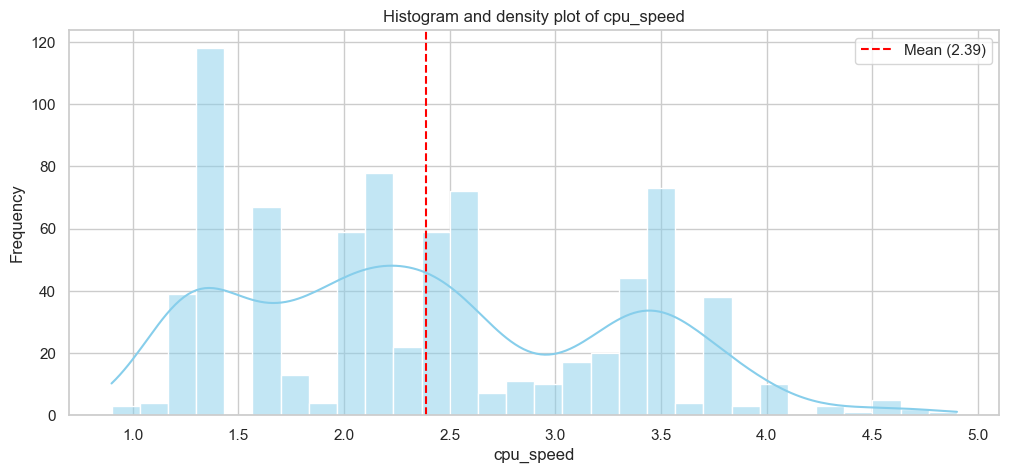

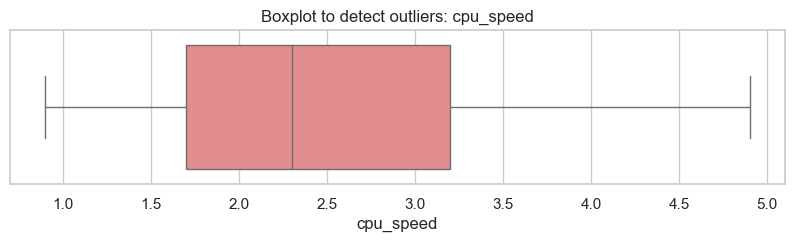

In [203]:
check_outliers(continuous_cols)

## Handling outliers

### height_mm , width_mm, depth_mm

#### height_mm: Just some values haven't been converted into mm yet

In [ ]:
outliers_result =  calculate_for_outliers(df['height_mm'])
print('Outliers: ')
print(outliers_result['outliers'])

In [100]:
df.loc[df['height_mm'] < 100, 'height_mm'] = df['height_mm'] * 10

### width_mm
- Some values have not converted into mm yet
- Others are wrong (ex: 1.6 mm for width??)

In [ ]:
outliers_result =  calculate_for_outliers(df['width_mm'])
print('Outliers: ')
print(outliers_result['outliers'])

In [111]:
index= [936, 937, 953, 1031,1032, 1288]
df.loc[index,['name','width_mm','height_mm','depth_mm', 'product_weight', 'root_price']]

,name,width_mm,height_mm,depth_mm,product_weight,root_price
936,Macbook Pro 14 inch 2021-Xám,1.6,NaN,NaN,1.6,52990000.0
937,Macbook Pro 14 inch 2021 | Chính hãng Apple Việt Nam-Bạc,1.6,NaN,NaN,1.6,52990000.0
953,Apple MacBook Pro 13 M2 2022 16GB 256GB I Chnh hng Apple Vit Nam,NaN,NaN,NaN,1.4,41990000.0
1031,MacBook Pro 14 inch M2 Max 32GB - 1TB 2023-Xám,1.6,NaN,NaN,1.6,81990000.0
1032,MacBook Pro 14 inch M2 Max 2023-Bạc,1.6,NaN,NaN,1.6,81990000.0
1288,Laptop ASUS Gaming ROG Zephyrus G14 GA401QM-211.ZG14,1.6,NaN,NaN,1.6,NaN


In [ ]:
df.loc[936,['width_mm', 'height_mm', 'depth_mm']] = [312.6, 221.2, 15.5]
df.loc[937,['width_mm', 'height_mm', 'depth_mm']] = [312.6, 221.2, 15.5]
df.loc[953,['width_mm', 'height_mm', 'depth_mm']] = [304.1, 212.4, 15.6]
df.loc[1031,['width_mm', 'height_mm', 'depth_mm']] = [312.6, 221.2, 15.5]
df.loc[1032,['width_mm', 'height_mm', 'depth_mm']] = [312.6, 221.2, 15.5]
df.loc[1288,['width_mm', 'height_mm', 'depth_mm']] = [324, 222, 17.9]

In [115]:
df.loc[df['width_mm'] < 100, 'width_mm'] = df['width_mm'] * 10

### depth_mm
- Some are not correctly converted into mm
- The large value (like 147, 207,...) is for the foot of the iMac

In [ ]:
outliers_result =  calculate_for_outliers(df['depth_mm'])
print('Outliers: ')
print(outliers_result['outliers'])

In [121]:
df.loc[4, 'depth_mm'] = 14.1

In [122]:
df.loc[df['depth_mm'] < 10, 'depth_mm'] = df['depth_mm'] * 10

### Check

In [130]:
filtered_df = df[
    ((df['height_mm'] == df['width_mm']) | 
     (df['height_mm'] == df['depth_mm']) | 
     (df['depth_mm'] == df['width_mm']))&
    (~df['name'].str.lower().str.contains('mac studio')) &
    (~df['name'].str.lower().str.contains('mac mini'))
][['name', 'height_mm', 'width_mm', 'depth_mm']]
filtered_df

,name,height_mm,width_mm,depth_mm
589,Laptop HP Gaming Victus 16-S0173AX A9LG9PA-Đen,369.0,369.0,259.4
612,Laptop HP Victus 16-R0376TX AY8Z2PA-Đen,369.0,369.0,259.4
628,Laptop Lenovo Yoga Duet 7 13ITL6 82MA009LPH-Tím,297.4,297.4,207.4
636,Laptop HP 14-EP0220TU B73VWPA V2-Bạc,323.7,323.7,215.0
693,Laptop HP Victus 16-S0136AX 9Q984PA-Bạc,369.0,369.0,259.4
938,Laptop ASUS ROG Flow Z13 GZ302EA-RU080WS-Đen,300.0,300.0,204.0
1216,Laptop HP 14-EP0220TU B73VWPA-Bạc,323.7,323.7,215.0


In [131]:
index =  [589, 612, 628, 636, 693, 938, 1216]
df.loc[index, 'height_mm'] = df.loc[index, 'depth_mm']

In [133]:
df.loc[index, 'depth_mm'] = [22.9, 22.9, 15, 17.9, 22.9, 12.9, 22.9]

### root_price & discounted price:
There is nothing wrong with the price. Some laptops are extraorinarily more expensive compared to others

In [ ]:
print('Outliers of root price: ')
outliers_result = calculate_for_outliers(df['root_price'])
print(outliers_result['outliers'])

### display_size: 
Values, considered as outliers, are actually the fact of:
- iMac (display_size = 24 inches)
- 351: Laptop Asus Zenbook DUO UX8406CA Ultra 9 285H/32GB/1TB/120Hz/OfficeHS24+365/Win11 (PZ109WS) consists 2 displays = 2 x 14 = 28 inches
- Mac mini and Mac studio don't have display -> values = 0

In [ ]:
print('Outliers of display_size: ')
outliers_result = calculate_for_outliers(df['display_size'])
print(outliers_result['outliers'])

### display_width & display_height: 
There is no observed abnormality 
- iMac tends to have bigger display
- Mac studio and Mac mini don't have display

In [ ]:
print('Outliers of display_width: ')
outliers_result = calculate_for_outliers(df['display_width'])
print(outliers_result['outliers'])

In [86]:
df.loc[965, 'name']

'Mac mini M4 2024 10CPU 10GPU 24GB 256GB | Chính hãng Apple Việt Nam-Bạc'

### product_weight:
There is no outliers, just some iMac, Mac mini, Mac pro that are extraordinary heavier than other
ex: Mac Pro M2 Ultra 2023: 16 kg is true

In [ ]:
print('Outliers of product_weight: ')
outliers_result = calculate_for_outliers(df['product_weight'])
print(outliers_result['outliers'])

In [136]:
df.loc[1284, 'name']

'Mac Pro M2 Ultra 2023'

### battery_capacity
- Some are in W so that they are too large -> Change into Wh
- Some are incorrectly extracted from free text 
- Battery_capacity = 0 because they are iMac, Mac studio, Mac mini

In [205]:
print('Outliers of battery_capacity: ')
outliers_result = calculate_for_outliers(df['battery_capacity'])
print(outliers_result['outliers'])

Outliers of battery_capacity: 
474       0.0
478     150.0
525       0.0
541       0.0
545       0.0
553       0.0
602       0.0
604       0.0
605       0.0
606       0.0
607       0.0
608       0.0
609       0.0
610       0.0
623       0.0
632       3.0
649       0.0
678       3.0
696       4.0
722       4.0
742       3.0
759       0.0
803       0.0
817       0.0
818       0.0
819       0.0
820       0.0
821       0.0
822       0.0
823       0.0
830       0.0
831       0.0
832       0.0
833       0.0
834       0.0
835       0.0
836       0.0
858       0.0
859       0.0
860       0.0
861       0.0
867       6.0
887       6.0
897       0.0
898       0.0
899       0.0
900       0.0
901       0.0
902       0.0
903       0.0
965       0.0
983       0.0
984       0.0
985       0.0
986       0.0
991       0.0
993       0.0
994       0.0
995       0.0
996       0.0
1001      0.0
1002      0.0
1012      0.0
1040      0.0
1053      0.0
1073      0.0
1102      0.0
1103      0.0
1104      0.0
111

In [211]:
index =  [478, 1252, 1269, 1280, 1342, 632, 678, 696, 722, 742, 887, 867]
df.loc[index,['name', 'battery_capacity']]

,name,battery_capacity
478,Laptop Gigabyte G5 MD-51S1123SH,48.96
1252,Laptop Dell Inspiron 14 5440 N4I7204W1-Xanh,54.00
1269,Laptop Dell Inspiron 15 3520 N3520-i5U085W11SLU-Bạc,41.00
1280,Laptop Dell Inspiron 15 3520 N3520-I5U165W11BLU,41.00
1342,Laptop Dell XPS 13 9350 XPSU7016W1-Xám,55.00
632,Laptop Dell Inspiron 15 3530 N5I5407W1-Đen,54.00
678,Laptop Dell Inspiron 15 3520 N3520-I5U165W11SLU-Bạc,41.00
696,Laptop Dell Inspiron 14 5440 N5440-C5U165W11IBD2-Xanh,54.00
722,Laptop Dell Inspiron 15 3530 N5I7240W1-Đen,54.00
742,Laptop Dell Inspiron 15 3530 N3530-Bạc,41.00


In [210]:
df.loc[index,'battery_capacity'] = [48.96, 54, 41, 41, 55, 54, 41, 54, 54, 41, 86, 86]


### cpu_max_speed
Those all are facts not outliers

In [ ]:
print('Outliers of cpu_max_speed: ')
outliers_result = calculate_for_outliers(df['cpu_max_speed'])
print(outliers_result['outliers']) 

# Numerical - Discrete

In [218]:
dicrete_cols = ['cam_ung', 'storage_max_support', 'storage_gb','bluetooth_version', 'cpu_threads', 'cpu_cores', 'ram_speed', 'refresh_rate', 'ram_storage', 'is_installment', 'ram_slots', 'vga_vram']

Column: cam_ung
Value count: 
         Number  Rate(%)
cam_ung                 
0          1293    95.57
1            60     4.43


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


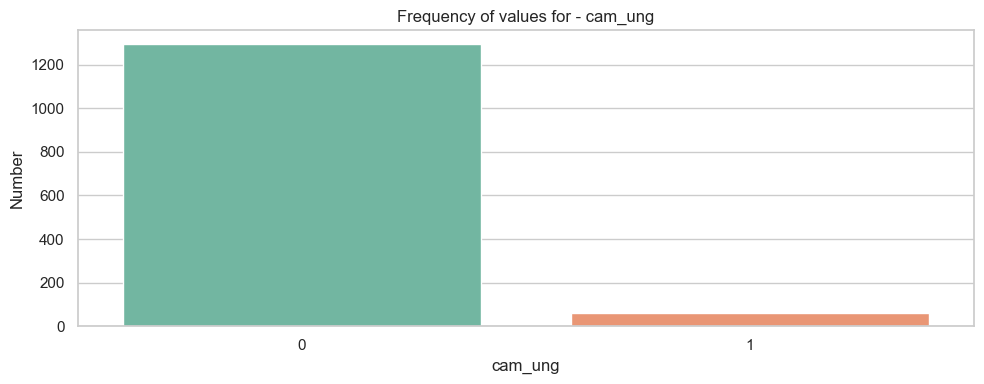

Column: storage_max_support
Value count: 
                     Number  Rate(%)
storage_max_support                 
512.0                   574    42.42
1024.0                  411    30.38
256.0                   173    12.79
2048.0                  143    10.57
4096.0                   22     1.63
3072.0                    6     0.44
500.0                     6     0.44
120.0                     3     0.22
8192.0                    3     0.22
320.0                     2     0.15
128.0                     2     0.15
32.0                      2     0.15
6144.0                    2     0.15
1021.0                    1     0.07
240.0                     1     0.07
250.0                     1     0.07
4048.0                    1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


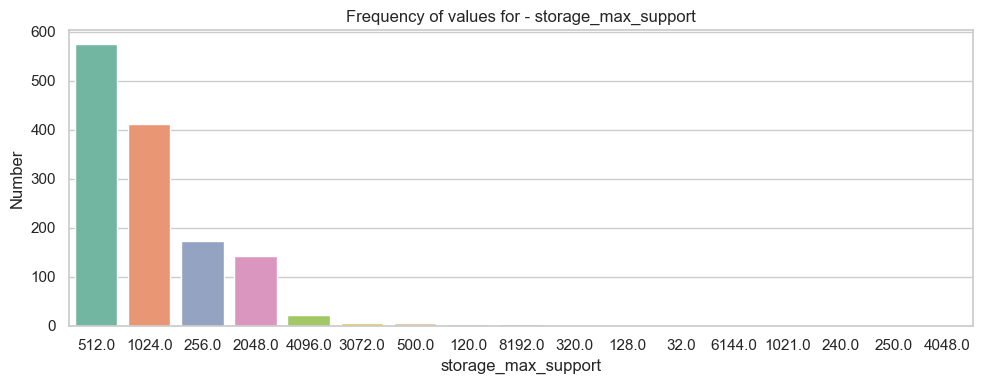

Column: storage_gb
Value count: 
            Number  Rate(%)
storage_gb                 
512.0          868    64.15
1024.0         267    19.73
256.0          180    13.30
2048.0          22     1.63
4096.0           4     0.30
8192.0           3     0.22
32.0             2     0.15
128.0            2     0.15
6144.0           2     0.15
120.0            2     0.15
3072.0           1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


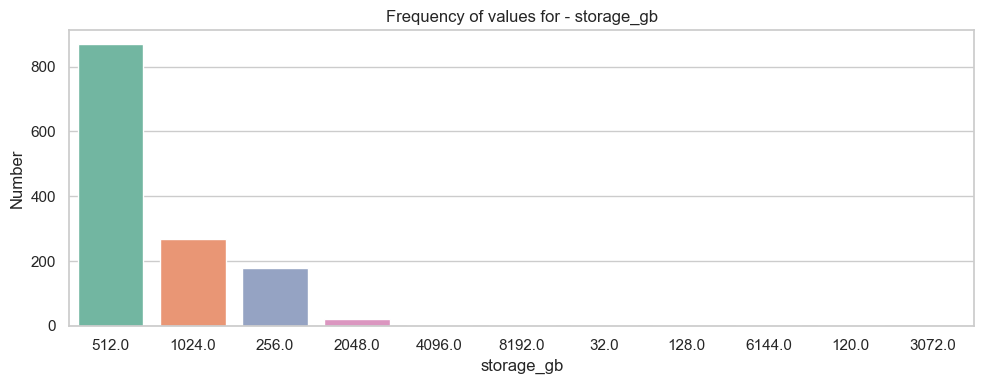

Column: bluetooth_version
Value count: 
                   Number  Rate(%)
bluetooth_version                 
5.3                   667    49.30
5.2                   207    15.30
0.0                   141    10.42
5.1                   120     8.87
5.0                   103     7.61
5.4                    85     6.28
4.2                    12     0.89
4.1                    11     0.81
4.0                     6     0.44
2.1                     1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


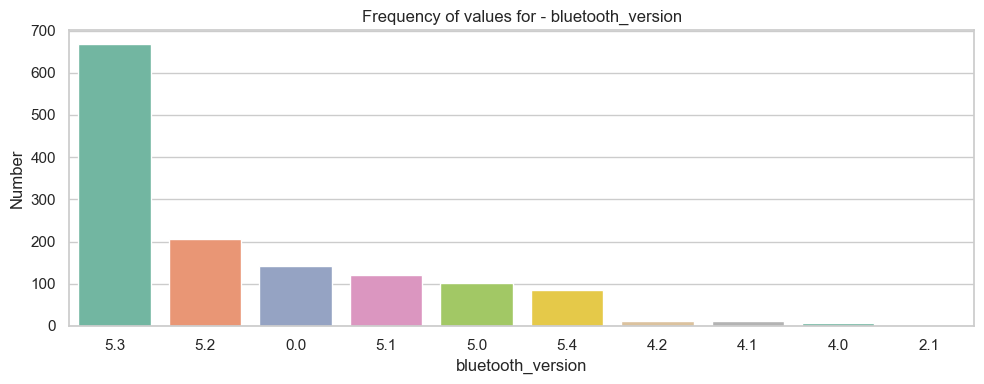

Column: cpu_threads
Value count: 
             Number  Rate(%)
cpu_threads                 
nan             642    47.45
12.0            268    19.81
16.0            168    12.42
8.0              78     5.76
22.0             40     2.96
20.0             39     2.88
14.0             32     2.37
24.0             25     1.85
18.0             22     1.63
32.0             19     1.40
4.0               9     0.67
28.0              5     0.37
2.0               3     0.22
6.0               2     0.15
10.0              1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


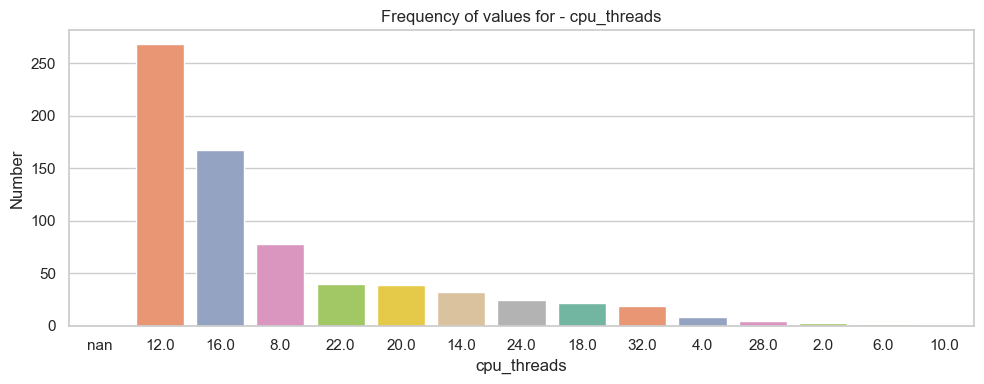

Column: cpu_cores
Value count: 
           Number  Rate(%)
cpu_cores                 
10.0          359    26.53
8.0           355    26.24
nan           160    11.83
12.0          137    10.13
14.0          112     8.28
6.0            71     5.25
16.0           70     5.17
4.0            34     2.51
24.0           31     2.29
2.0            11     0.81
20.0            6     0.44
11.0            5     0.37
5.0             2     0.15


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


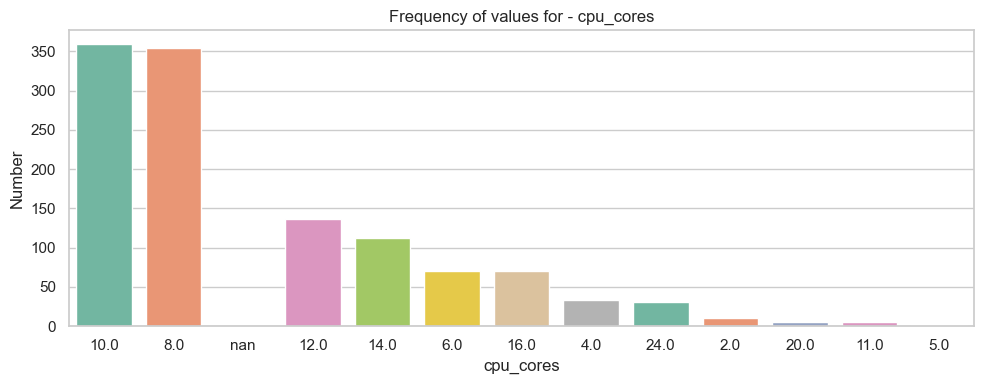

Column: ram_speed
Value count: 
           Number  Rate(%)
ram_speed                 
3200.0        211    15.59
6400.0        206    15.23
7500.0        195    14.41
4800.0        164    12.12
nan           150    11.09
5600.0         84     6.21
5200.0         65     4.80
2666.0         56     4.14
8533.0         55     4.07
7467.0         44     3.25
2400.0         23     1.70
4266.0         15     1.11
1600.0         14     1.03
2133.0         13     0.96
8448.0          9     0.67
2933.0          9     0.67
2800.0          8     0.59
4266.5          5     0.37
8000.0          4     0.30
1333.0          3     0.22
5500.0          3     0.22
6000.0          3     0.22
4400.0          2     0.15
3733.5          2     0.15
2000.0          2     0.15
2660.0          2     0.15
1866.0          2     0.15
320.0           1     0.07
4267.0          1     0.07
3733.0          1     0.07
2600.0          1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


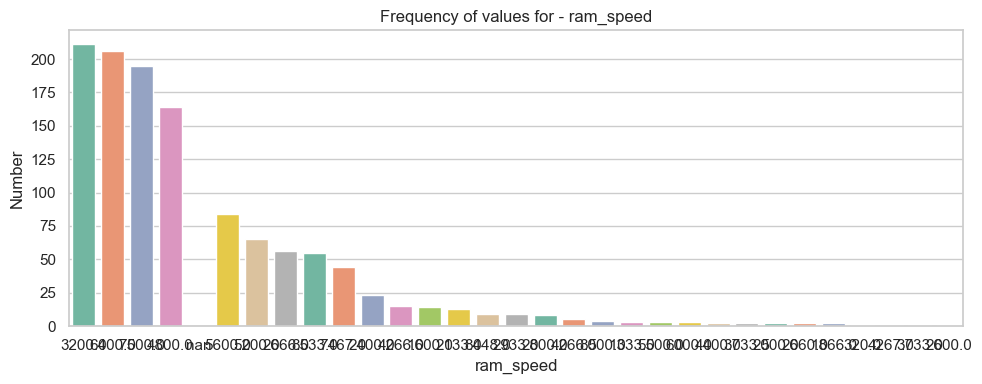

Column: refresh_rate
Value count: 
              Number  Rate(%)
refresh_rate                 
nan              409    30.23
60.0             404    29.86
120.0            249    18.40
144.0            177    13.08
165.0             49     3.62
240.0             44     3.25
90.0              13     0.96
48.0               4     0.30
180.0              3     0.22
250.0              1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


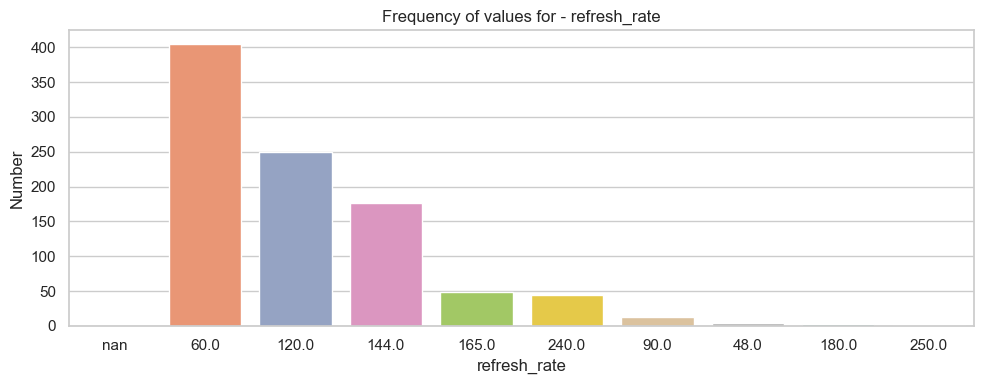

Column: ram_storage
Value count: 
             Number  Rate(%)
ram_storage                 
16.0            736    54.40
8.0             224    16.56
32.0            161    11.90
24.0            120     8.87
4.0              27     2.00
64.0             27     2.00
36.0             24     1.77
48.0             14     1.03
12.0              9     0.67
18.0              5     0.37
128.0             4     0.30
96.0              1     0.07
192.0             1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


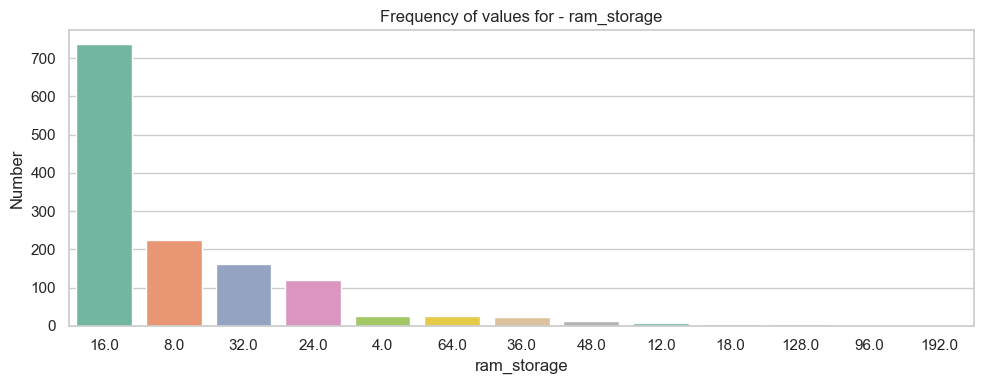

Column: is_installment
Value count: 
                Number  Rate(%)
is_installment                 
0                  897     66.3
1                  456     33.7


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


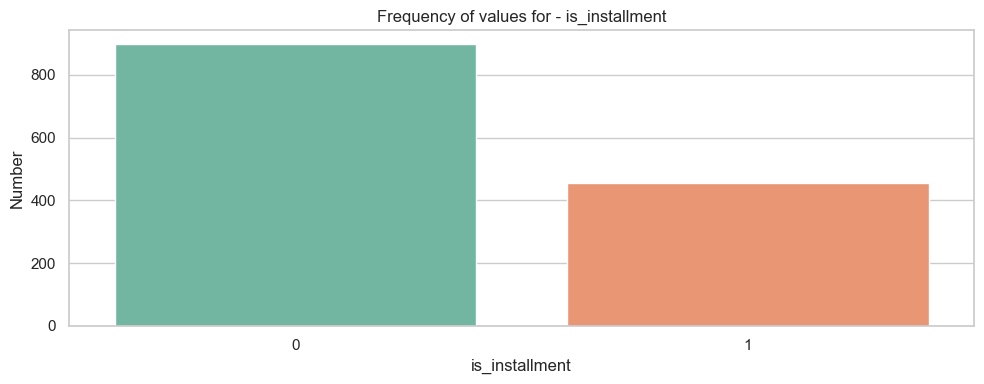

Column: ram_slots
Value count: 
           Number  Rate(%)
ram_slots                 
0.0           636    47.01
2.0           557    41.17
nan           117     8.65
1.0            39     2.88
4.0             3     0.22
3.0             1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


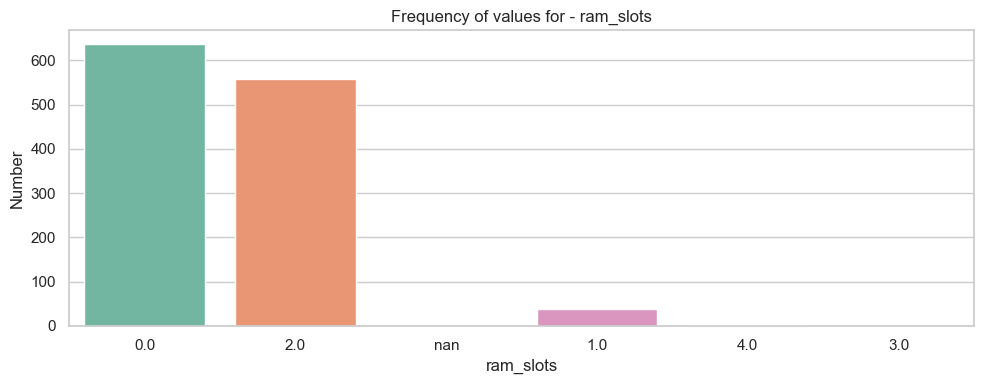

Column: vga_vram
Value count: 
          Number  Rate(%)
vga_vram                 
nan          985    72.80
6.0          109     8.06
4.0           97     7.17
8.0           80     5.91
120.0         42     3.10
2.0           14     1.03
16.0          12     0.89
12.0           8     0.59
24.0           5     0.37
410.0          1     0.07


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/2793164648.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=order)


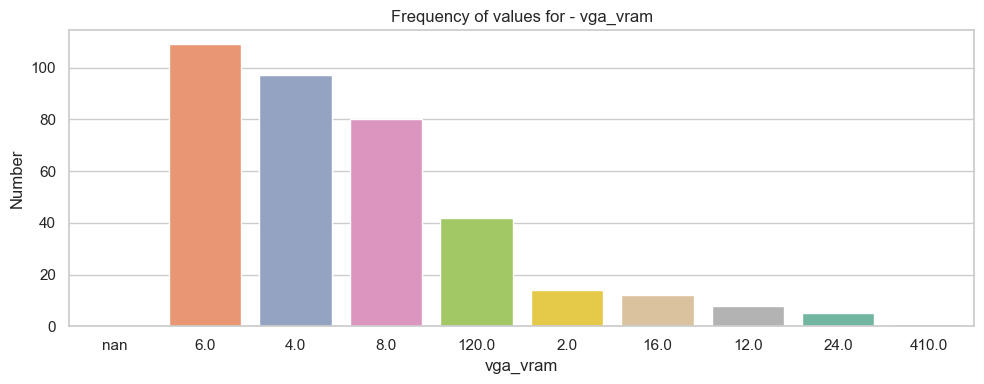

In [219]:
for col in dicrete_cols:
    print(f"Column: {col}")
    print("=" * 50)
    # 1. Value count
    print("Value count: ")
    counts = df[col].astype(str).value_counts()
    percents = df[col].astype(str).value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
        'Number': counts,
        'Rate(%)': percents.round(2)
    })
    print(result)
    
    # 2. Bar chart
    order = counts.index.tolist()
    # order =  sorted(pd.to_numeric(df[col], errors= 'coerce').dropna().astype(int).unique())
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, palette="Set2", order=order)
    
    plt.title(f"Frequency of values for - {col}")
    plt.xlabel(col)
    plt.ylabel("Number")
    plt.tight_layout()
    plt.show()

# Categorical

In [220]:
meta_data = ['url_path', 'name', 'image',  'product_id']

In [221]:
numerical_cols =  continuous_cols + dicrete_cols + meta_data
categorical_cols = [col for col in df.columns if col not in numerical_cols]
HIGH_CARDINALITY = 30
TOP_TO_SHOW = 20

Column: material
Value counts and Percentages (including NA)
                                          Number  Rate (%)
material                                                  
vỏ kim loại                                  572     42.28
vỏ nhựa                                      488     36.07
vỏ nhôm tái chế 100%                         100      7.39
vỏ nhựa - nắp lưng bằng kim loại              59      4.36
vỏ nhựa - nắp lưng kim loại                   53      3.92
vỏ kim loại - nhôm                            48      3.55
vỏ nhựa - chiếu nghỉ tay bằng kim loại         6      0.44
nắp lưng và chiếu nghỉ tay bằng kim loại       6      0.44
vỏ kim loại - nắp lưng bằng nhựa               4      0.30
nhôm - magie                                   4      0.30
mặt trên sợi carbon - mặt dưới nhôm            3      0.22
vỏ kim loại magie                              3      0.22
hợp kim nhôm-carbon                            2      0.15
mặt a - magie và mặt c+d - aluminum            2      

/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


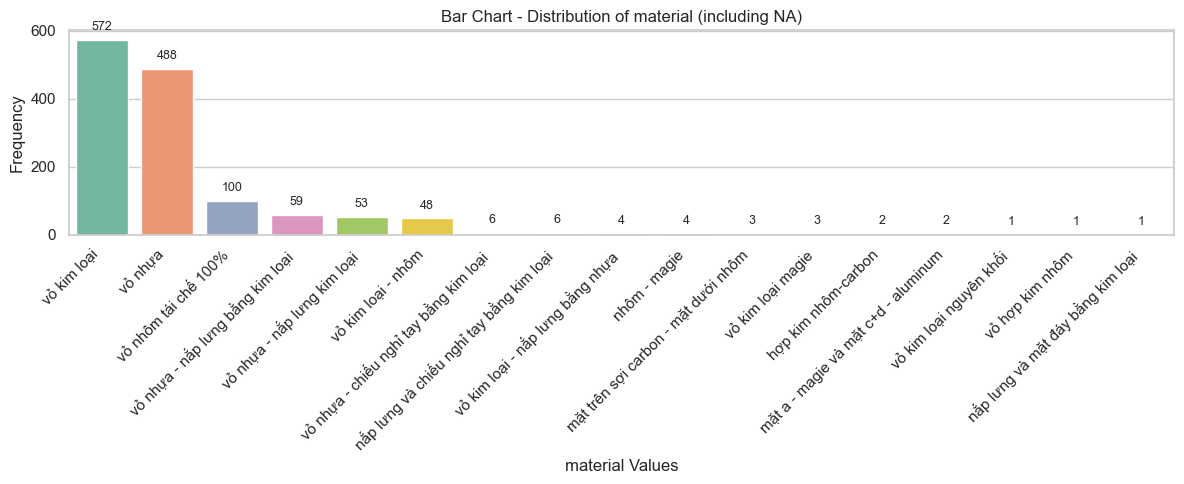

Column: manufacturer
Value counts and Percentages (including NA)
              Number  Rate (%)
manufacturer                  
apple            398     29.42
asus             233     17.22
lenovo           187     13.82
hp               152     11.23
dell             140     10.35
acer             100      7.39
msi               98      7.24
gigabyte          16      1.18
lg                15      1.11
vaio               4      0.30
samsung            3      0.22
huawei             3      0.22
hãng khác          2      0.15
masstel            1      0.07
avita              1      0.07
Number of unique values (excluding NA): 15
Number of NA values: 0 (0%)
Low Cardinality (15 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


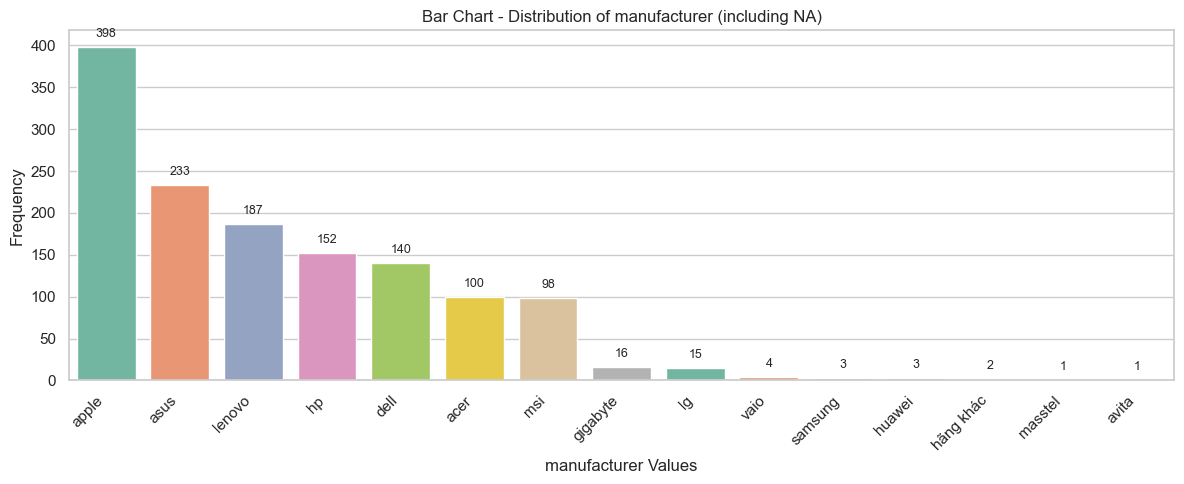

Column: ram_type
Value counts and Percentages (including NA)
          Number  Rate (%)
ram_type                  
DDR4         256     18.92
LPDDR5       238     17.59
DDR5         199     14.71
LPDDR5X      161     11.90
ddr5         126      9.31
ddr4         117      8.65
<NA>         113      8.35
lpddr5        89      6.58
LPDDR4X       18      1.33
DDR3          12      0.89
DDR3L          6      0.44
LPDDR3         6      0.44
lpddr4         5      0.37
LPDDR4         5      0.37
GDDR5          1      0.07
LPĐR3          1      0.07
Number of unique values (excluding NA): 15
Number of NA values: 113 (8.35%)
Low Cardinality (15 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


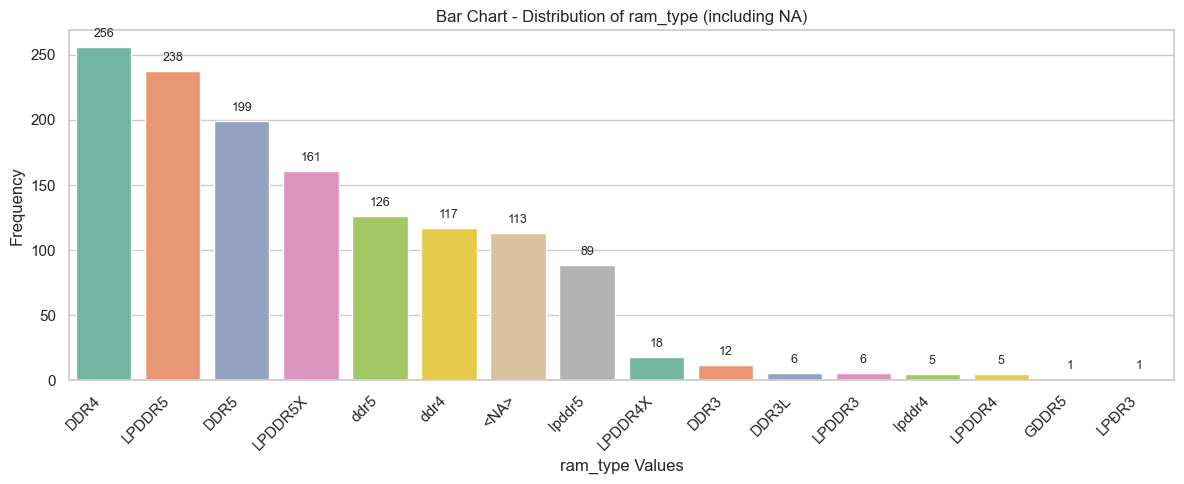

Column: os_version
Value counts and Percentages (including NA)
            Number  Rate (%)
os_version                  
windows 11     861     63.64
macos          398     29.42
windows 10      70      5.17
free dos        15      1.11
windows 7        5      0.37
chrome os        2      0.15
windows 8        2      0.15
Number of unique values (excluding NA): 7
Number of NA values: 0 (0%)
Low Cardinality (7 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


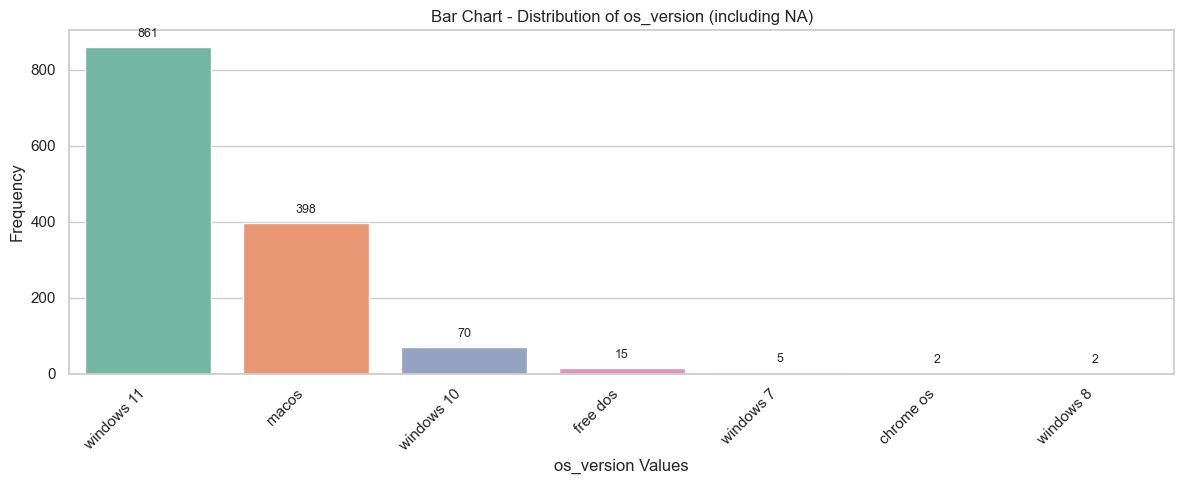

Column: laptop_color
Value counts and Percentages (including NA)
                   Number  Rate (%)
laptop_color                       
đen                   377     27.86
xám                   193     14.26
bạc                   190     14.04
Bạc                   117      8.65
Xám                   115      8.50
Đen                   103      7.61
xanh                   31      2.29
Vàng                   29      2.14
Xanh Dương             21      1.55
Xanh đen               19      1.40
trắng vàng             19      1.40
Xanh da trời nhạt      13      0.96
vàng                   13      0.96
xanh da trời           11      0.81
đêm xanh thẳm          11      0.81
ánh sao                10      0.74
hồng                    9      0.67
trắng                   9      0.67
xanh lá                 8      0.59
xanh dương              8      0.59
256 GB                  8      0.59
Xanh                    8      0.59
tím                     6      0.44
Vàng đồng               5      0.37

/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts_to_plot.index, y=counts_to_plot.values, palette='viridis', order=counts_to_plot.index)


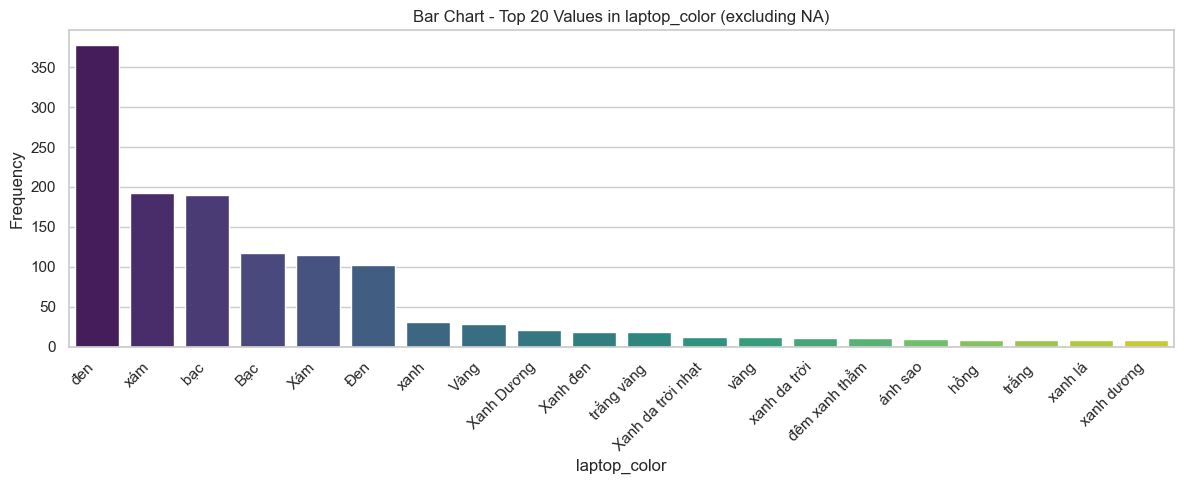

Column: cpu_model
Value counts and Percentages (including NA)
                    Number  Rate (%)
cpu_model                           
<NA>                   283     20.92
hãng không công bố     102      7.54
1235U                   30      2.22
13620H                  29      2.14
13420H                  27      2.00
155h                    25      1.85
1235u                   24      1.77
155H                    23      1.70
1335U                   21      1.55
12450H                  21      1.55
1355u                   18      1.33
13620h                  17      1.26
1335u                   17      1.26
13500H                  16      1.18
125H                    16      1.18
13420h                  15      1.11
1355U                   15      1.11
13650HX                 15      1.11
12500H                  14      1.03
14900HX                 13      0.96
1215U                   12      0.89
1255U                   12      0.89
125h                    11      0.81
12450h       

/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts_to_plot.index, y=counts_to_plot.values, palette='viridis', order=counts_to_plot.index)


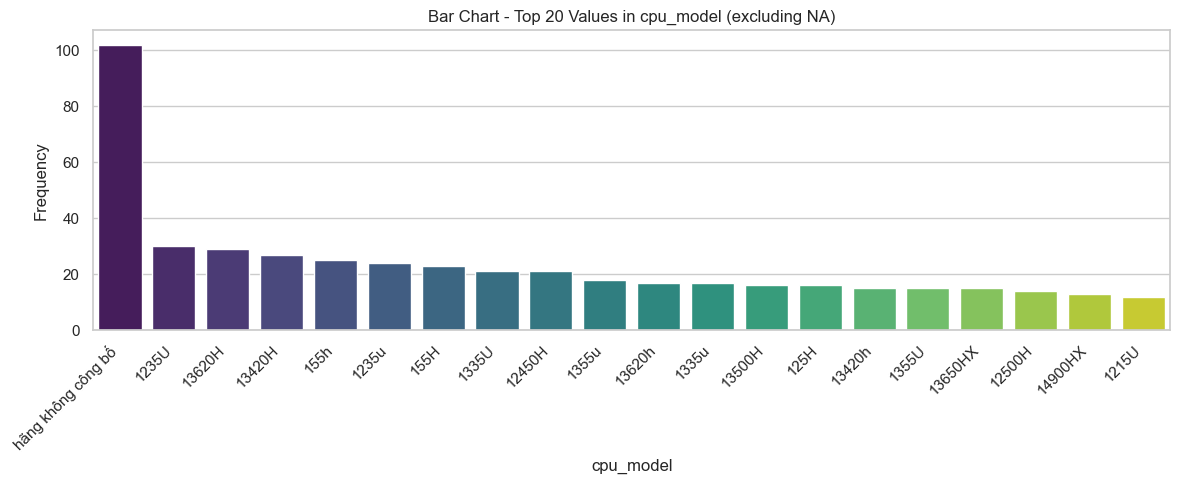

Column: nhu_cau_su_dung
Value counts and Percentages (including NA)
                                                                                                                        Number  Rate (%)
nhu_cau_su_dung                                                                                                                         
['học tập - văn phòng']                                                                                                    228     16.85
['học tập - văn phòng', 'cao cấp - sang trọng', 'mỏng nhẹ']                                                                140     10.35
['đồ họa - kỹ thuật', 'gaming']                                                                                            131      9.68
['học tập - văn phòng', 'đồ họa - kỹ thuật', 'cao cấp - sang trọng', 'mỏng nhẹ', 'laptop sáng tạo nội dung']               126      9.31
['học tập - văn phòng', 'mỏng nhẹ']                                                                           

/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts_to_plot.index, y=counts_to_plot.values, palette='viridis', order=counts_to_plot.index)
/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


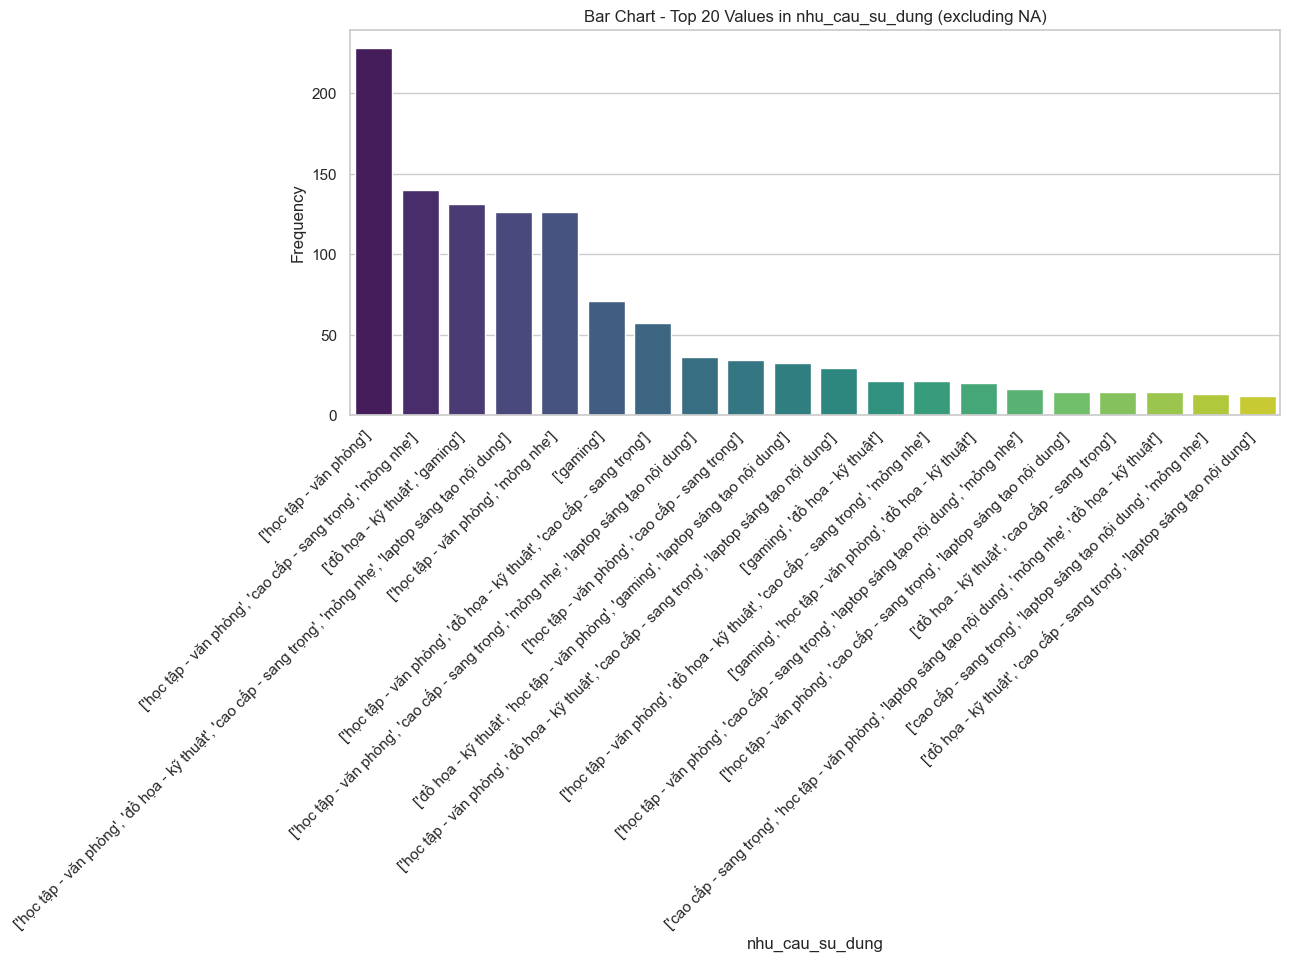

Column: vga_type
Value counts and Percentages (including NA)
               Number  Rate (%)
vga_type                       
card tích hợp     957     70.73
card rời          383     28.31
<NA>               13      0.96
Number of unique values (excluding NA): 2
Number of NA values: 13 (0.96%)
Low Cardinality (2 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


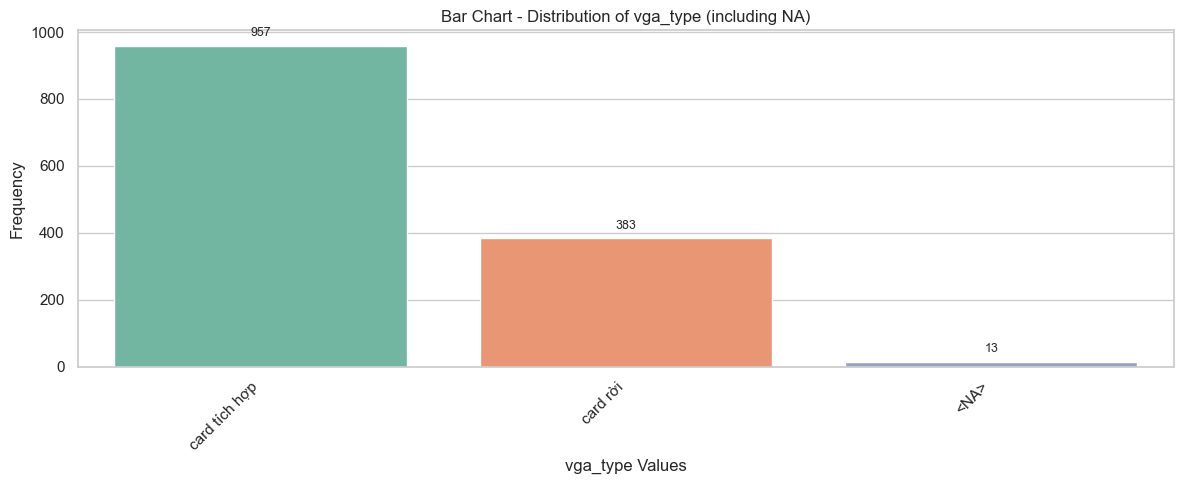

Column: vga_brand
Value counts and Percentages (including NA)
           Number  Rate (%)
vga_brand                  
intel         532     39.32
apple         397     29.34
nvidia        339     25.06
amd            74      5.47
qualcomm       11      0.81
Number of unique values (excluding NA): 5
Number of NA values: 0 (0%)
Low Cardinality (5 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


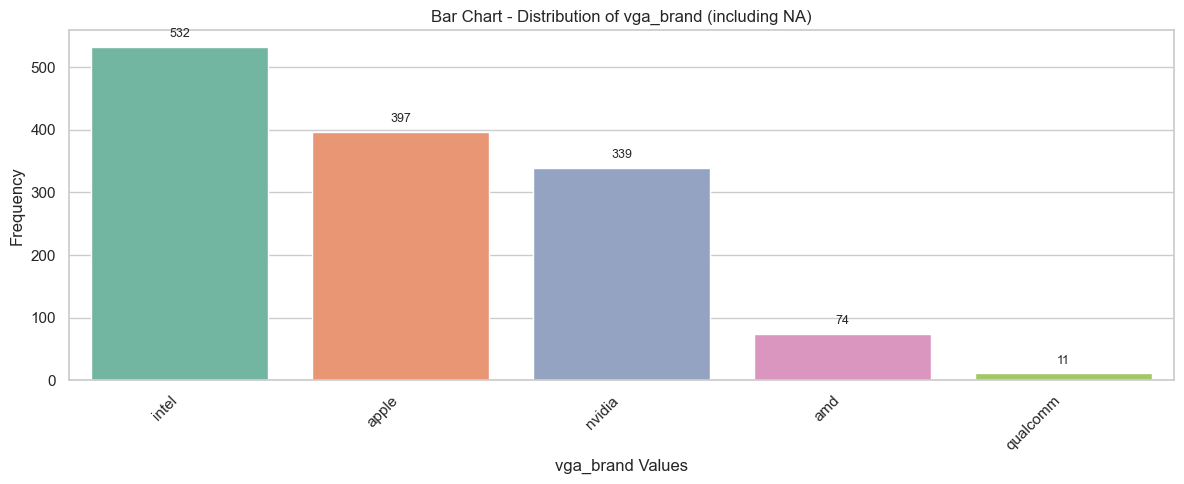

Column: cpu_series
Value counts and Percentages (including NA)
                    Number  Rate (%)
cpu_series                          
core i5                326     24.09
core i7                201     14.86
m4                     172     12.71
m3                      92      6.80
core ultra 7            82      6.06
ryzen 7                 59      4.36
ryzen 5                 57      4.21
core ultra 5            56      4.14
core i3                 50      3.70
m2                      40      2.96
m4 pro                  35      2.59
core ultra 9            27      2.00
core i9                 24      1.77
m4 max                  14      1.03
m3 pro                  13      0.96
ryzen ai 9              12      0.89
core 5                  11      0.81
ryzen ai 7              10      0.74
core 7                   9      0.67
m3 max                   9      0.67
m1                       7      0.52
ryzen 9                  6      0.44
m2 max                   6      0.44
snapdragon x

/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts_to_plot.index, y=counts_to_plot.values, palette='viridis', order=counts_to_plot.index)


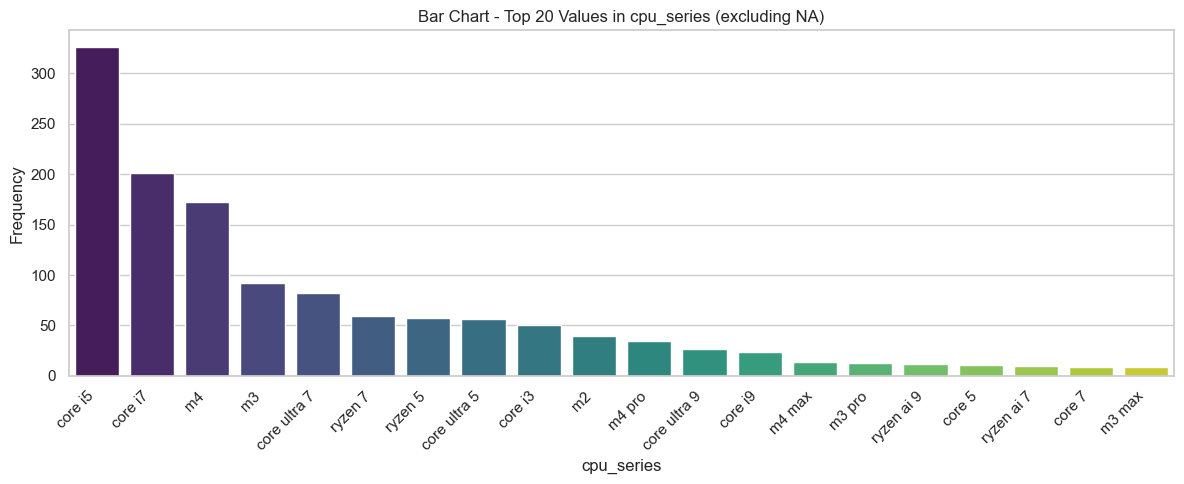

Column: laptop_camera
Value counts and Percentages (including NA)
               Number  Rate (%)
laptop_camera                  
full hd           445     32.89
hd                379     28.01
Full HD           258     19.07
HD                192     14.19
<NA>               79      5.84
Number of unique values (excluding NA): 4
Number of NA values: 79 (5.84%)
Low Cardinality (4 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


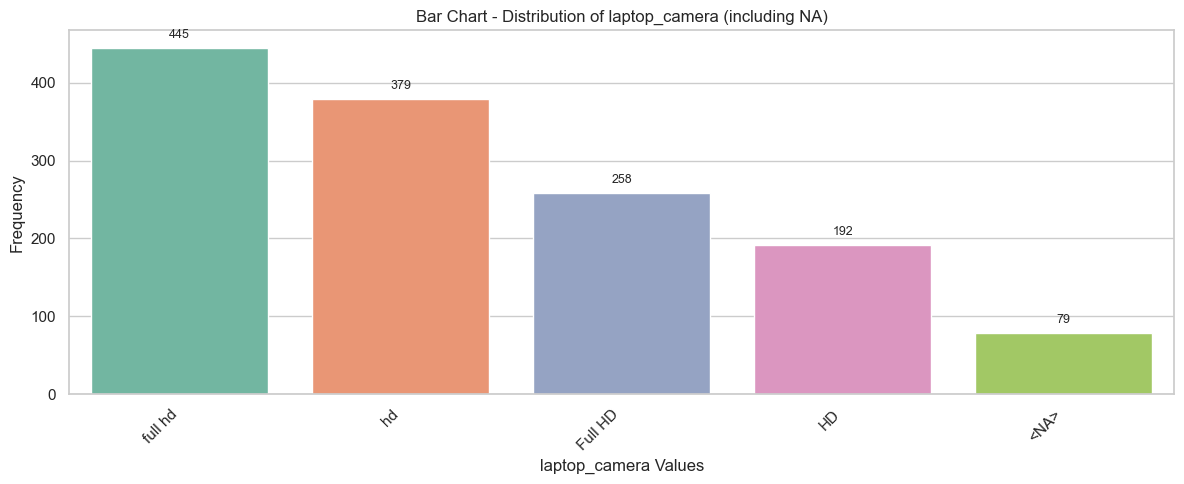

Column: cpu_brand
Value counts and Percentages (including NA)
           Number  Rate (%)
cpu_brand                  
intel         796     58.83
apple         397     29.34
amd           149     11.01
qualcomm       11      0.81
Number of unique values (excluding NA): 4
Number of NA values: 0 (0%)
Low Cardinality (4 unique values <= 30)


/var/folders/f7/w82860sx5s50by_v5jj51mxm0000gn/T/ipykernel_1146/1542613064.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)


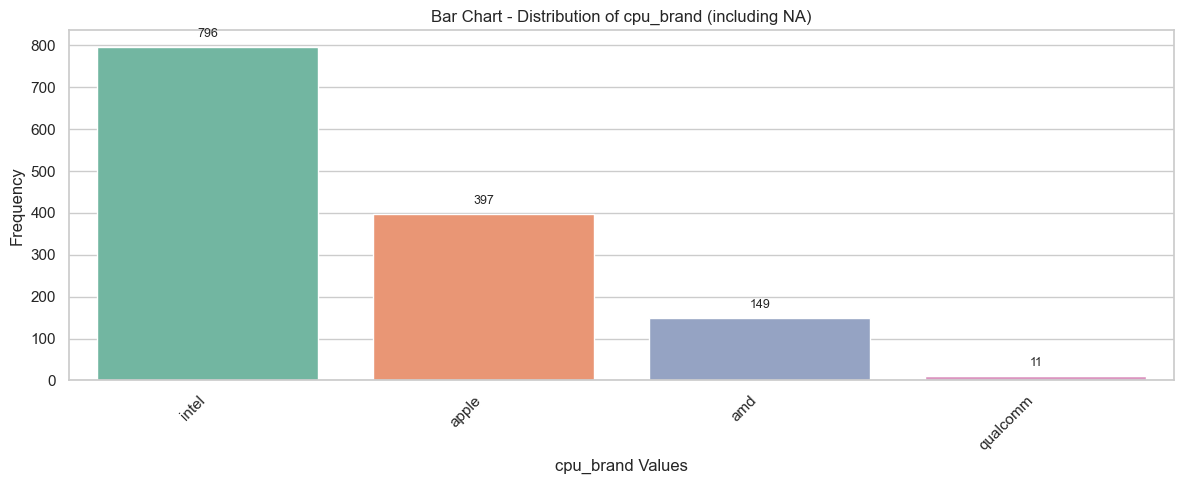

In [222]:
for col in categorical_cols:
    print(f"Column: {col}")
    # 1. Prepare data: covert to string, strip whitespace, and standardize missing values to pd.NA
    temp_seies = df[col].astype(str).str.strip()
    temp_seies = temp_seies.replace(['', 'nan', 'None', 'NaN', 'null', '[]'], pd.NA)
    
    # 2. Calculate value counts and percantage (including NA)
    counts = temp_seies.value_counts(dropna=False)
    percents = temp_seies.value_counts(normalize=True, dropna=False) * 100
    
    result_df = pd.DataFrame({
        "Number": counts,
        "Rate (%)": percents.round(2)
    })
    print('Value counts and Percentages (including NA)')
    print(result_df)
    print("="* 50)
    
    num_unique_without_na = temp_seies.nunique()
    print(f"Number of unique values (excluding NA): {num_unique_without_na}")
    
    # Check if NA exists in the index after value_coounts
    if pd.NA in counts.index:
        na_count = counts[pd.NA]
        na_percent = percents[pd.NA]
        print(f"Number of NA values: {na_count} ({na_percent:.2f}%)")
    else:
        print(f"Number of NA values: 0 (0%)")
    print("=" * 50)
    
    # 3. Draw chart base on cardinality (excluding NA)
    counts_without_na = counts.drop(pd.NA, errors='ignore')
    if num_unique_without_na == 0:
        print(f"{col} contains all NA. Skip")
        continue
    
    # High cardinality: if there are too many unqiue values -> just show top 20
    if num_unique_without_na > HIGH_CARDINALITY:
        print(f"High Cardinality ({num_unique_without_na} unique values > {HIGH_CARDINALITY}) -> just show top {TOP_TO_SHOW}")
        counts_to_plot =  counts_without_na.head(TOP_TO_SHOW)
        plt.figure(figsize=(12, 5))
        sns.barplot(x = counts_to_plot.index, y=counts_to_plot.values, palette='viridis', order=counts_to_plot.index)
        plt.title(f'Bar Chart - Top {TOP_TO_SHOW} Values in {col} (excluding NA)')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
    # Low cardinality -> show NA as well
    else:
        print(f"Low Cardinality ({num_unique_without_na} unique values <= {HIGH_CARDINALITY})")
        plot_index = counts.index.to_series().fillna('<NA>').astype(str)
        plot_value = counts.values
        plt.figure(figsize=(12, 5))
        sns.barplot(x=plot_index, y=plot_value, palette='Set2', order=plot_index)
        plt.title(f'Bar Chart - Distribution of {col} (including NA)')
        plt.xlabel(col + " Values") 
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        
        # Add counts labels to bars
        ax = plt.gca()
        for p in ax.patches:
            height = p.get_height()
            if pd.notna(height) and height > 0:
                ax.annotate(f"{int(height)}",
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=9,
                            xytext=(0,5),
                            textcoords='offset points'
                            )
        plt.tight_layout()
        plt.show()
        



### material

In [223]:
df['material'] = df['material'].replace(
    ['nhôm - magie', 'vỏ nhôm tái chế 100%', 'vỏ kim loại - nhôm',
     'mặt trên sợi carbon - mặt dưới nhôm', 'vỏ kim loại magie', 'hợp kim nhôm-carbon',
     'mặt a - magie và mặt c+d - aluminum', 'vỏ kim loại nguyên khối',
     'vỏ hợp kim nhôm', 'nắp lưng và mặt đáy bằng kim loại', 'vỏ kim loại - nắp lưng bằng nhựa',
     'nắp lưng và chiếu nghỉ tay bằng kim loại'],
    'vỏ kim loại'
)
df['material'] = df['material'].replace('vỏ nhựa - nắp lưng bằng kim loại', 'vỏ nhựa - nắp lưng kim loại')
df['material'] = df['material'].replace('vỏ nhựa - chiếu nghỉ tay bằng kim loại','vỏ nhựa')


### ram_type

In [224]:
df['ram_type'] = df['ram_type'].str.lower().str.strip()

In [225]:
df['ram_type'] = df['ram_type'].replace('lpđr3','lpddr3')

In [226]:
df['ram_type'].unique()

array(['lpddr5', 'ddr4', nan, 'ddr5', 'lpddr4', 'lpddr5x', 'lpddr4x',
       'lpddr3', 'ddr3', 'ddr3l', 'gddr5'], dtype=object)

### laptop_color

In [227]:
df['laptop_color'] = df['laptop_color'].str.lower().str.strip()

In [228]:
df['laptop_color'].unique()

array(['xám', 'bạc', 'đen', 'vàng', '16gb - 256gb', 'xanh dương', 'xanh',
       'vàng đồng', 'xanh đen', 'trắng', 'màu be', '256 gb', '512 gb',
       'xanh da trời nhạt', 'trắng vàng', 'ánh sao', 'đêm xanh thẳm',
       'xanh da trời', 'be', 'tím', 'xanh lá', 'cam', 'hồng', 'vàng hồng'],
      dtype=object)

In [229]:
df['laptop_color'] = df['laptop_color'].replace(['xanh đen','đêm xanh thẳm','xanh da trời','xanh da trời nhạt','xanh'], 'xanh dương')
df['laptop_color'] = df['laptop_color'].replace('màu be', 'be')
df['laptop_color'] = df['laptop_color'].replace(['vàng đồng','trắng vàng','ánh sao','vàng hồng'], 'vàng')

In [230]:
df.loc[(df['laptop_color'] == '16gb - 256gb')|
       (df['laptop_color'] == '256 gb')|
       (df['laptop_color'] == '512 gb'),
       ['product_id','name']]

,product_id,name
55,0220042002497__l101_20250402-105034,Laptop Apple MacBook Air 13 inch M2 16GB/256GB/10GPU (Z15S)
56,0220042002498__l101_20250402-105034,Laptop Apple MacBook Air 13 inch M2 16GB/256GB/10GPU (Z15W)
57,0220042002500__l101_20250402-105034,Laptop Apple MacBook Air 13 inch M2 16GB/256GB/10GPU (Z160)
376,0220042003063__l349_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/256GB
377,0220042003064__l349_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/256GB
378,0220042003065__l349_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/256GB
379,0220042003066__l349_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/256GB
380,0220042003067__l350_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/512GB
381,0220042003068__l350_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/512GB
382,0220042003069__l350_20250402-105034,Laptop MacBook Air 13 inch M4 16GB/512GB


In [231]:
index = [55, 56, 57]
df.loc[index, 'laptop_color'] = ['xám', 'bạc', 'xanh dương']
index_1 = [376, 377, 378, 379]
df.loc[index_1, 'laptop_color'] = ['đen', 'xám', 'xanh dương', 'vàng']

index_2 = [380, 381, 382, 383]
df.loc[index_2, 'laptop_color'] = ['đen', 'xám', 'xanh dương', 'vàng']

index_3 = [ 388, 389, 390, 391, 392]
df.loc[index_3, 'laptop_color'] = ['đen', 'xám', 'xanh dương', 'vàng', 'đen']


In [232]:
df['laptop_color'].unique()

array(['xám', 'bạc', 'đen', 'vàng', 'xanh dương', 'trắng', 'be', 'tím',
       'xanh lá', 'cam', 'hồng'], dtype=object)

### cpu_model

In [233]:
df['cpu_model'] =  df['cpu_model'].str.lower().str.strip()

### cpu_series

In [234]:
df.loc[df['cpu_series'] == 'm1 pro/m1 max',['name']]

,name
936,Macbook Pro 14 inch 2021-Xám
937,Macbook Pro 14 inch 2021 | Chính hãng Apple Việt Nam-Bạc
952,Macbook Pro 14 M1 Pro 10 CPU - 16 GPU 16GB 1TB 2021


In [235]:
df['cpu_series'] = df['cpu_series'].replace('m1 pro/m1 max', 'm1 pro')

### laptop_camera

In [236]:
df['laptop_camera'] = df['laptop_camera'].str.lower().str.strip()

In [237]:
df['laptop_camera'].nunique()

2

# Meta data

In [238]:
df.to_csv('output/laptop_merged_cleaned.csv', index=False)